# F1 Performance Factors: Exploratory Data Analysis

<br>

## 1. Introduction

The objective of this Exploratory Data Analysis (EDA) is to explore and understand the performance trends of drivers and teams over the 2024 Formula 1 season. The datasets, sourced from [Kaggle](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv), provides comprehensive information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from the latest 2024 season. This analysis aims to address questions that will help uncover insights into both individual and team dynamics, as well as broader race strategies.

#### Research Questions
- **Overall Performance:**
    - How many points did each driver score over the season? This helps assess overall performance and consistency.
    - How many races did each driver win? Winning races is a key indicator of a driver's competitiveness.

- **Qualifying vs. Race Performance:** 
    - How does a driver's starting position correlate with their finishing position? This can reveal insights into a driver's ability to improve positions during a race.
    - What is the average starting and finishing position for each driver? This helps identify drivers who consistently outperform their qualifying results.

- **Consistency and Reliability:** 
    - How many races did each driver finish vs. retire? This provides insights into reliability and consistency.
    - What is the distribution of race statuses (e.g., Finished, Retired) for each driver? Understanding race outcomes can highlight reliability issues.

- **Team Dynamics:** 
    - How do drivers within the same team compare in terms of points and wins? This can highlight the impact of driver skill vs. car performance.
    - Which teams have the most consistent driver pairings? Consistency within a team can indicate strong team dynamics and strategy.
        
- **Race-Specific Performance:** 
    - Which tracks or races did each driver perform best at? Identifying strong performances at specific tracks can inform future strategies.
    - How does driver performance vary across different types of tracks (e.g., street circuits vs. traditional tracks)? This can reveal strengths and weaknesses in different racing environments.

- **Strategic Insights**
    - How often did drivers achieve the fastest lap, and how does this correlate with their finishing position? Fastest laps can indicate strong race pace and strategic decisions.
    - What is the correlation between pit stop strategies and race outcomes for each driver? Understanding pit stop impacts can inform strategic decisions.

#### Purpose and Importance
These questions can help uncover meaningful insights into driver performance over the season. By focusing on these areas, a comprehensive analysis can be provided that highlights key performance indicators, strategic decisions, and team dynamics in Formula 1 racing.

<br>

## 2. Data Overview

#### Data Acquisition

The data is compiled from http://ergast.com/mrd/. The data provided by Kaggle can be accessed through the link provided below:
- [Download Data](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)

#### Key Features of the Dataset

- **Race, Driver, Team Name**: Represents the race specific values.

- **Rank, Points, Wins, Status, Pit Stops**: Represents the race specific results per driver.

- **Start Position, End Position, Fastest Lap, Fastest Lap Speed, Fastest Time, Pit Stop Time**: Represents the race specific performance values per driver.

<br>

## 3. Initial Data Exploration

In this section, the necessary libraries and datasets needed for analysis will be imported and initialized.

The following libraries are used:
- Library `pandas` will be required to work with data in tabular representation.

- Library `numpy` will be required to round the numerical data.

- Library `scipy` will be required to visualize statistical values in the data.

- Library `matplotlib`, `seaborn`, `plotly` will be required for data visualization.

In [55]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import warnings
%matplotlib inline

# Settings
sns.set_theme(style="darkgrid")
pd.set_option('display.max_rows', 10)
pio.renderers.default = 'notebook'

# Set up logging
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [56]:
import pandas as pd

# Import data and save it as DataFrame
driver_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv', usecols=["forename", "surname", "driverId"] )
team_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv', usecols=["name", "constructorId"] )
standing_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv', usecols=["raceId", "driverId", "wins"] )
race_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv', usecols=["raceId", "year", "name"] )
pit_stop_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv', usecols=['raceId', 'driverId', 'stop', 'milliseconds'])
results_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv', usecols=["raceId", "driverId", "constructorId", "milliseconds", "grid", "position", "points", "laps", 'fastestLap', 'rank', 'fastestLapSpeed', 'fastestLapTime', 'statusId'] )
status_data = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/status.csv', usecols=['statusId', 'status'])

# Filter data
race_data = race_data[race_data["year"] == 2024]

# Calculate average number of pit stops and average duration per race
average_pit_stops = pit_stop_data.groupby('raceId').agg(
    total_stops=('stop', 'size'),
    total_duration=('milliseconds', 'sum'),
    num_drivers=('driverId', 'nunique')
).reset_index()

average_pit_stops['average_stops'] = (average_pit_stops['total_stops'] / average_pit_stops['num_drivers']).round(2)
average_pit_stops['average_duration_ms'] = (average_pit_stops['total_duration'] / average_pit_stops['total_stops']).round(2)
average_pit_stops['average_duration'] = (average_pit_stops['average_duration_ms'] / 1000).round(2)

# Merge data
drivers_df = pd.merge(driver_data, standing_data, on='driverId', how='inner')
races_df = pd.merge(race_data, results_data, on='raceId', suffixes=('_race', '_results'), how='inner')
races_df = pd.merge(races_df, team_data, on='constructorId', suffixes=('_race', '_team'), how='left')
races_df = pd.merge(races_df, status_data, on='statusId', how='left')
race_df = pd.merge(races_df, average_pit_stops, on='raceId', how='left', suffixes=('', '_pit'))
data_df = pd.merge(race_df, drivers_df, on=['raceId', 'driverId'], validate='many_to_one', how='inner')


In [57]:
# Dimensions of the data
print(f'The data contains {data_df.shape[0]} records and {data_df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{data_df.dtypes.value_counts()}')

# Display driver data
data_df.head()

The data contains 479 records and 26 columns.

The data contains the following data types: 
int64      11
object     11
float64     4
Name: count, dtype: int64


,raceId,year,name_race,driverId,constructorId,grid,position,points,laps,milliseconds,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,forename,surname,wins
0,1121,2024,Bahrain Grand Prix,830,9,1,1,26.0,57,5504742,...,Finished,43,1145475,20,2.15,26638.95,26.64,Max,Verstappen,1
1,1121,2024,Bahrain Grand Prix,815,9,5,2,18.0,57,5527199,...,Finished,43,1145475,20,2.15,26638.95,26.64,Sergio,Pérez,0
2,1121,2024,Bahrain Grand Prix,832,6,4,3,15.0,57,5529852,...,Finished,43,1145475,20,2.15,26638.95,26.64,Carlos,Sainz,0
3,1121,2024,Bahrain Grand Prix,844,6,2,4,12.0,57,5544411,...,Finished,43,1145475,20,2.15,26638.95,26.64,Charles,Leclerc,0
4,1121,2024,Bahrain Grand Prix,847,131,3,5,10.0,57,5551530,...,Finished,43,1145475,20,2.15,26638.95,26.64,George,Russell,0


<br>

## 4. Data Cleaning and Preprocessing

In this section, data pre-processing will be conducted by examining data types, addressing missing values, removing duplicates, analyzing measures of central tendency, and extracting features.

### 4.1 Missing Values

In [58]:
# Initialize a list to store the results
missing_vals = []

# Check percentage of missing data
for col in data_df.columns:
    pct_missing = data_df[col].isnull().mean()
    missing_vals.append(f'{col} - {pct_missing:.0%}')

# Join the results into a single string and print
print(', '.join(missing_vals))

raceId - 0%, year - 0%, name_race - 0%, driverId - 0%, constructorId - 0%, grid - 0%, position - 0%, points - 0%, laps - 0%, milliseconds - 0%, fastestLap - 0%, rank - 0%, fastestLapTime - 0%, fastestLapSpeed - 0%, statusId - 0%, name_team - 0%, status - 0%, total_stops - 0%, total_duration - 0%, num_drivers - 0%, average_stops - 0%, average_duration_ms - 0%, average_duration - 0%, forename - 0%, surname - 0%, wins - 0%


There seems to be no missing data but that is due to missing values being replaces with `'\N'`. This will give errors in analysis, and thus should be replaced with 0. Columns with NaN values will be excluded from analysis and make calculations possible.

In [59]:
# Example of \N values existing
data_df.tail(2)

,raceId,year,name_race,driverId,constructorId,grid,position,points,laps,milliseconds,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,forename,surname,wins
477,1144,2024,Abu Dhabi Grand Prix,861,3,20,\N,0.0,26,\N,...,Engine,28,686585,19,1.47,24520.89,24.52,Franco,Colapinto,0
478,1144,2024,Abu Dhabi Grand Prix,815,9,10,\N,0.0,0,\N,...,Collision,28,686585,19,1.47,24520.89,24.52,Sergio,Pérez,0


In [60]:
# Replace '\N' values with 0 in the entire DataFrame
df_copy = data_df.copy()
df_copy = df_copy.replace('\\N', 0)

# Ensure missing value replacement
df_copy.tail(2)

,raceId,year,name_race,driverId,constructorId,grid,position,points,laps,milliseconds,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,forename,surname,wins
477,1144,2024,Abu Dhabi Grand Prix,861,3,20,0,0.0,26,0,...,Engine,28,686585,19,1.47,24520.89,24.52,Franco,Colapinto,0
478,1144,2024,Abu Dhabi Grand Prix,815,9,10,0,0.0,0,0,...,Collision,28,686585,19,1.47,24520.89,24.52,Sergio,Pérez,0


**CONCLUSION:**

The dataset contains no missing values, so no additional modifications are needed.

### 4.2 Duplicates

The data can be reduced or simplified by identifying and removing duplicate entries.


In [61]:
# Check for duplicates in columns
duplicate_vals = []

for col in df_copy:
    if df_copy[col].duplicated().any() == True:
        duplicate_vals.append(f'Column {col} contains duplicates.')
    else:
        duplicate_vals.append(f'Column {col} contains no duplicates.')

# Join the results into a single string and print
print(', '.join(duplicate_vals))

Column raceId contains duplicates., Column year contains duplicates., Column name_race contains duplicates., Column driverId contains duplicates., Column constructorId contains duplicates., Column grid contains duplicates., Column position contains duplicates., Column points contains duplicates., Column laps contains duplicates., Column milliseconds contains duplicates., Column fastestLap contains duplicates., Column rank contains duplicates., Column fastestLapTime contains duplicates., Column fastestLapSpeed contains duplicates., Column statusId contains duplicates., Column name_team contains duplicates., Column status contains duplicates., Column total_stops contains duplicates., Column total_duration contains duplicates., Column num_drivers contains duplicates., Column average_stops contains duplicates., Column average_duration_ms contains duplicates., Column average_duration contains duplicates., Column forename contains duplicates., Column surname contains duplicates., Column wins

It is understandable that there may be duplicate values in the dataset, as fields like `position`, `points`, and `driverId` are often repeated across the multiple races. Therefore, there is no need to remove these duplicates. However, since the race data is filtered according to the 2024 races, the `year`, `constructorId`, `driverId_pit`, and `statusId` columns can be dropped entirely.

In [62]:
# Drop redundant columns
df_copy = df_copy.drop(['year', 'constructorId', 'statusId'], axis=1)

However, it is important to check the data for anomalies, such as spelling errors, inconsistent casing, or typing mistakes.

In [63]:
# Strip whitespace and trailing spaces
for col in df_copy:
    if df_copy[col].dtype == 'object':
        print(f'Before Stripping {col}: {len(set(df_copy[col]))} After Stripping {col}: {len(set(df_copy[col].str.title().str.strip()))}')

Before Stripping name_race: 24 After Stripping name_race: 24
Before Stripping position: 21 After Stripping position: 21
Before Stripping milliseconds: 289 After Stripping milliseconds: 289
Before Stripping fastestLap: 67 After Stripping fastestLap: 67
Before Stripping rank: 21 After Stripping rank: 21
Before Stripping fastestLapTime: 443 After Stripping fastestLapTime: 443
Before Stripping fastestLapSpeed: 443 After Stripping fastestLapSpeed: 443
Before Stripping name_team: 10 After Stripping name_team: 10
Before Stripping status: 19 After Stripping status: 19
Before Stripping forename: 24 After Stripping forename: 24
Before Stripping surname: 24 After Stripping surname: 24


The data must be reviewed for unique values, taking into account typographical errors, spelling mistakes, and variations in the strings provided. It is common for the same names to be listed with slight differences in spelling or formatting (for example, "Bahrain Grand Prix," "BGP,"). Conducting a frequency analysis can help identify these variations by highlighting multiple entries that should correspond to a single entity. To detect these anomalies, it is necessary to count the frequency of each entry.

In [64]:
# Frequency analysis
race_name_counts = df_copy['name_race'].value_counts()
race_team_counts = df_copy['name_team'].value_counts()
driver_name_counts = df_copy['forename'].value_counts()
driver_surname_counts = df_copy['surname'].value_counts()

display(race_name_counts)
display(race_team_counts)
display(driver_name_counts)
display(driver_surname_counts)

name_race
Bahrain Grand Prix          20
Saudi Arabian Grand Prix    20
Qatar Grand Prix            20
Las Vegas Grand Prix        20
São Paulo Grand Prix        20
                            ..
Miami Grand Prix            20
Chinese Grand Prix          20
Japanese Grand Prix         20
Abu Dhabi Grand Prix        20
Australian Grand Prix       19
Name: count, Length: 24, dtype: int64

name_team
Red Bull          48
Ferrari           48
Mercedes          48
McLaren           48
Aston Martin      48
Sauber            48
Haas F1 Team      48
RB F1 Team        48
Alpine F1 Team    48
Williams          47
Name: count, dtype: int64

forename
Max          24
Fernando     24
Nico         24
Alexander    24
Yuki         24
             ..
Logan        14
Franco        9
Liam          6
Oliver        3
Jack          1
Name: count, Length: 24, dtype: int64

surname
Verstappen    24
Alonso        24
Hülkenberg    24
Albon         24
Tsunoda       24
              ..
Sargeant      14
Colapinto      9
Lawson         6
Bearman        3
Doohan         1
Name: count, Length: 24, dtype: int64

The majority of races in the dataset appear exactly 20 times each. The `Australian Grand Prix` appears `19` times instead of 20. This could have been due to a technical problem with data collection for one driver during this event, or there might have been a disqualification. For now, this race will be kept in the analysis as this outlier will be investigated later on.

Full-time drivers such as Verstappen, Pérez, Leclerc, Russell, and Hamilton participated in all the races of the 2024 season, each making a total of 24 appearances. In contrast, drivers with fewer appearances, like Colapinto, often served as `temporary replacements`, leading to their lower participation numbers. For this analysis, these replacements will be kept in since we want to fully analyse the performance of teams later on. They will however be flagged as substitutes.

In [65]:
# Count appearances of each driver
driver_counts = df_copy['driverId'].value_counts()
driver_counts = df_copy['driverId'].value_counts()
df_copy['Role'] = df_copy['driverId'].apply(lambda x: 'Full-Time' if driver_counts[x] == 24 else 'Substitute')

# Frequency analysis
driver_name_counts = df_copy[['driverId', 'Role']].drop_duplicates()
display(driver_name_counts)

,driverId,Role
0,830,Full-Time
1,815,Full-Time
2,832,Substitute
3,844,Full-Time
4,847,Full-Time
...,...,...
19,858,Substitute
26,860,Substitute
310,861,Substitute
367,859,Substitute


In [66]:
# Check for duplicates
print(df_copy.duplicated(subset=['driverId']))

0      False
1      False
2      False
3      False
4      False
       ...  
474     True
475     True
476     True
477     True
478     True
Length: 479, dtype: bool


**CONCLUSION:** 

Each dataset entry returned a stable pattern of frequencies (`drivers = 24`, `races = 20`), indicating valid duplicates exist for across the data. Therefore, no further data transformation is necessary.

### 4.3 Transformation

In [67]:
# Check column data type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   raceId               479 non-null    int64  
 1   name_race            479 non-null    object 
 2   driverId             479 non-null    int64  
 3   grid                 479 non-null    int64  
 4   position             479 non-null    object 
 5   points               479 non-null    float64
 6   laps                 479 non-null    int64  
 7   milliseconds         479 non-null    object 
 8   fastestLap           479 non-null    object 
 9   rank                 479 non-null    object 
 10  fastestLapTime       479 non-null    object 
 11  fastestLapSpeed      479 non-null    object 
 12  name_team            479 non-null    object 
 13  status               479 non-null    object 
 14  total_stops          479 non-null    int64  
 15  total_duration       479 non-null    int

Data types classified as `object` typically consume more memory than other data types, which can result in delays during program execution. Consequently, these data types are good candidates for conversion to `categorical`. A categorical variable has a limited and often fixed number of possible values. 

Good candidates for this conversion include **name**, **role**, and **status**.

In [68]:
# Convert object dtype columns to category dtype
df_copy['name_race'] = df_copy['name_race'].astype('category')
df_copy['name_team'] = df_copy['name_team'].astype('category')
df_copy['status'] = df_copy['status'].astype('category')
df_copy['Role'] = df_copy['Role'].astype('category')

Data types of `object` types that cannot be categorized yet can be converted into `string` format. Good candidates for this conversion include **forename** and **surname**.

In [69]:
# Convert object dtype columns to string dtype
df_copy['forename'] = df_copy['forename'].astype('string')
df_copy['surname'] = df_copy['surname'].astype('string')

Object that are of datetime format should be converted to `milliseconds`. Good candidates for this conversion include **fastestLapTime**.

In [70]:
# Convert valid times to timedelta first
def convert_to_timedelta(time_str):
    if pd.isna(time_str):
        return pd.NaT
    try:
        return pd.to_timedelta('00:' + time_str)
    except:
        return pd.NaT

# Convert timedelta to milliseconds
df_copy['fastestLapTimeDelta'] = df_copy['fastestLapTime'].apply(convert_to_timedelta)
df_copy['fastestLapTime'] = df_copy['fastestLapTimeDelta'].dt.total_seconds() * 1000
df_copy.drop('fastestLapTimeDelta', axis=1, inplace=True)

Object that are of numeric type should be converted to `int` or `float`. Good candidates for this conversion include **fastestLapSpeed**, **fastestLapTime**, **rank**, and **fastestlap**, **milliseconds**, and **position**.

In [71]:
# Convert object dtype columns to numeric dtype
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = df_copy[col].astype('float')

df_copy['grid'] = df_copy['grid'].astype(int)
df_copy['position'] = df_copy['position'].astype(int)
df_copy['rank'] = df_copy['rank'].astype(int)
df_copy['points'] = df_copy['points'].astype(int)
df_copy['fastestLap'] = df_copy['fastestLap'].astype(int)
df_copy['average_stops'] = df_copy['average_stops'].astype(int)

In [72]:
# Verify the conversions
df_copy.info()
df_copy.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   raceId               479 non-null    int64   
 1   name_race            479 non-null    category
 2   driverId             479 non-null    int64   
 3   grid                 479 non-null    int64   
 4   position             479 non-null    int64   
 5   points               479 non-null    int64   
 6   laps                 479 non-null    int64   
 7   milliseconds         479 non-null    float64 
 8   fastestLap           479 non-null    int64   
 9   rank                 479 non-null    int64   
 10  fastestLapTime       447 non-null    float64 
 11  fastestLapSpeed      479 non-null    float64 
 12  name_team            479 non-null    category
 13  status               479 non-null    category
 14  total_stops          479 non-null    int64   
 15  total_duration       47

,raceId,name_race,driverId,grid,position,points,laps,milliseconds,fastestLap,rank,...,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,forename,surname,wins,Role
474,1144,Abu Dhabi Grand Prix,825,14,16,0,57,0.0,57,1,...,28,686585,19,1,24520.89,24.52,Kevin,Magnussen,0,Substitute
475,1144,Abu Dhabi Grand Prix,859,12,17,0,55,0.0,52,12,...,28,686585,19,1,24520.89,24.52,Liam,Lawson,0,Substitute
476,1144,Abu Dhabi Grand Prix,822,9,0,0,30,0.0,14,19,...,28,686585,19,1,24520.89,24.52,Valtteri,Bottas,0,Full-Time
477,1144,Abu Dhabi Grand Prix,861,20,0,0,26,0.0,5,17,...,28,686585,19,1,24520.89,24.52,Franco,Colapinto,0,Substitute
478,1144,Abu Dhabi Grand Prix,815,10,0,0,0,0.0,0,0,...,28,686585,19,1,24520.89,24.52,Sergio,Pérez,0,Full-Time


**CONCLUSION:** 

All data are in the correct types and formats; therefore, no further data transformation is needed.

### 4.4 Feature Engineering

Combining the driver name and surname into one column would simplify the dataset and improve readability.

In [73]:
df_copy['Driver'] = df_copy['forename'] + " " + df_copy['surname']
df_copy.drop(['surname', 'forename'], axis=1, inplace=True)
df_copy['Driver'] = df_copy['Driver'].astype('category')
df_copy.head(2)

,raceId,name_race,driverId,grid,position,points,laps,milliseconds,fastestLap,rank,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,wins,Role,Driver
0,1121,Bahrain Grand Prix,830,1,1,26,57,5504742.0,39,1,...,Finished,43,1145475,20,2,26638.95,26.64,1,Full-Time,Max Verstappen
1,1121,Bahrain Grand Prix,815,5,2,18,57,5527199.0,40,4,...,Finished,43,1145475,20,2,26638.95,26.64,0,Full-Time,Sergio Pérez


Sorting the columns by `raceId` will facilitate analysis and improve readability.

In [74]:
# Sort the DataFrame by 'raceId' in descending order
df_copy = df_copy.sort_values(by=['Driver', 'raceId'], ascending=True).reset_index()
df_copy.head(2)

,index,raceId,name_race,driverId,grid,position,points,laps,milliseconds,fastestLap,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,wins,Role,Driver
0,14,1121,Bahrain Grand Prix,848,13,15,0,56,0.0,40,...,+1 Lap,43,1145475,20,2,26638.95,26.64,0,Full-Time,Alexander Albon
1,30,1122,Saudi Arabian Grand Prix,848,12,11,0,50,4931627.0,50,...,Finished,19,483509,18,1,25447.84,25.45,0,Full-Time,Alexander Albon


Rounding the numeric columns to whole numbers will make data easier to interpret and present. 

In [75]:
# Round life expectancy to 1 decimal place
df_copy = df_copy.round(1)
df_copy.head(2)

,index,raceId,name_race,driverId,grid,position,points,laps,milliseconds,fastestLap,...,status,total_stops,total_duration,num_drivers,average_stops,average_duration_ms,average_duration,wins,Role,Driver
0,14,1121,Bahrain Grand Prix,848,13,15,0,56,0.0,40,...,+1 Lap,43,1145475,20,2,26639.0,26.6,0,Full-Time,Alexander Albon
1,30,1122,Saudi Arabian Grand Prix,848,12,11,0,50,4931627.0,50,...,Finished,19,483509,18,1,25447.8,25.4,0,Full-Time,Alexander Albon


Renaming columns to more descriptive names enhances the clarity and readability of the dataset, making it easier to understand and work with. 

In [76]:
# Rename columns
df_copy.columns = df_copy.columns.str.title()

df_copy = df_copy.rename(columns={'Milliseconds' : 'Completion Time'})
df_copy = df_copy.rename(columns={'Fastestlap' : 'Fastest Lap'})
df_copy = df_copy.rename(columns={'Laps' : 'Total Laps'})
df_copy = df_copy.rename(columns={'Raceid' : 'Race ID'})
df_copy = df_copy.rename(columns={'Driverid' : 'Driver ID'})
df_copy = df_copy.rename(columns={'Fastestlaptime' : 'Fastest Lap Time'})
df_copy = df_copy.rename(columns={'Fastestlapspeed' : 'Fastest Lap Speed'})
df_copy = df_copy.rename(columns={'Name_Race' : 'Race Name'})
df_copy = df_copy.rename(columns={'Name_Team' : 'Team'})
df_copy = df_copy.rename(columns={'Name' : 'Race Name'})
df_copy = df_copy.rename(columns={'Grid' : 'Start Position'})
df_copy = df_copy.rename(columns={'Position' : 'End Position'})
df_copy = df_copy.rename(columns={'Average_Stops' : 'Average Pit Stops'})
df_copy = df_copy.rename(columns={'Average_Duration' : 'Average Stop Duration'})

# Re-sort
df_copy = df_copy.reindex(columns=['Race ID', 'Race Name', 'Driver ID', 'Driver', 'Team', 'Role', 'Rank', 'Points', 'Wins', 'Status', 'Start Position', 'End Position', 'Average Pit Stops', 'Average Stop Duration', 'Total Laps', 'Fastest Lap', 'Fastest Lap Speed', 'Fastest Lap Time'])

df_copy.head()

,Race ID,Race Name,Driver ID,Driver,Team,Role,Rank,Points,Wins,Status,Start Position,End Position,Average Pit Stops,Average Stop Duration,Total Laps,Fastest Lap,Fastest Lap Speed,Fastest Lap Time
0,1121,Bahrain Grand Prix,848,Alexander Albon,Williams,Full-Time,17,0,0,+1 Lap,13,15,2,26.6,56,40,203.5,95723.0
1,1122,Saudi Arabian Grand Prix,848,Alexander Albon,Williams,Full-Time,9,0,0,Finished,12,11,1,25.4,50,50,240.8,92307.0
2,1123,Australian Grand Prix,848,Alexander Albon,Williams,Full-Time,17,0,0,+1 Lap,12,11,2,19.7,57,46,232.8,81618.0
3,1124,Japanese Grand Prix,848,Alexander Albon,Williams,Full-Time,0,0,0,Accident,14,0,3,543.2,0,0,0.0,NaN
4,1125,Chinese Grand Prix,848,Alexander Albon,Williams,Full-Time,12,0,0,Finished,14,12,2,25.5,56,34,194.7,100790.0


To simplify future visualization, it will be beneficial to recategorize the `Status` columns into simpler values.

In [77]:
status_categories = {
    # Finished statuses
    'Finished': 'Finished',
    '+1 Lap': 'Finished (Lapped)',
    '+2 Laps': 'Finished (Lapped)',
    '+3 Laps': 'Finished (Lapped)',
    
    # Mechanical failures
    'Retired': 'Mechanical Failure',
    'Power Unit': 'Mechanical Failure',
    'Hydraulics': 'Mechanical Failure',
    'Radiator': 'Mechanical Failure',
    'Water pressure': 'Mechanical Failure',
    'Overheating': 'Mechanical Failure',
    'Gearbox': 'Mechanical Failure',
    'Engine': 'Mechanical Failure',
    'Turbo': 'Mechanical Failure',
    'Electrical': 'Mechanical Failure',
    
    # Accidents/Incidents
    'Collision': 'Accident',
    'Accident': 'Accident',
    'Spun off': 'Accident',
    'Damage': 'Accident',
    
    # Other
    'Disqualified': 'Other',
    'Did not qualify': 'Other'
}

# Replace values in column with broader categories
df_copy['Status'] = df_copy['Status'].astype(str).map(status_categories)
df_copy['Status'] = df_copy['Status'].fillna('Other')
df_copy['Status'] = df_copy['Status'].astype('category')

**CONCLUSION:** 

All essential data columns, formatting, and feature engineering have been applied; therefore, no further data transformation is necessary.

### 4.5 Outliers

Outliers can distort and mislead the analysis process, resulting in inaccurate predictions and insights. Therefore, addressing outliers is essential when preparing data for analysis or machine learning models. 

Generating summary statistics is a quick and effective way to assess whether a dataset contains outliers.

In [78]:
# Check summary statistics
df_copy.describe()

,Race ID,Driver ID,Rank,Points,Wins,Start Position,End Position,Average Pit Stops,Average Stop Duration,Total Laps,Fastest Lap,Fastest Lap Speed,Fastest Lap Time
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,447.000000
mean,1132.519833,754.668058,9.549061,5.100209,0.626305,10.022965,8.590814,1.498956,141.311691,55.415449,41.981211,199.970981,88499.102908
std,6.923002,251.685665,6.014035,7.231844,1.505991,5.786065,5.784809,0.646441,355.560687,16.082055,18.665568,56.414539,10067.150748
min,1121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.700000,0.000000,0.000000,0.000000,67694.000000
25%,1127.000000,822.000000,4.000000,0.000000,0.000000,5.000000,3.500000,1.000000,22.800000,51.000000,35.500000,196.550000,80919.000000
50%,1133.000000,840.000000,10.000000,1.000000,0.000000,10.000000,8.000000,1.000000,25.400000,57.000000,46.000000,211.900000,88604.000000
75%,1138.500000,848.000000,15.000000,9.500000,1.000000,15.000000,13.000000,2.000000,29.450000,69.000000,53.000000,230.500000,96325.000000
max,1144.000000,862.000000,20.000000,26.000000,9.000000,20.000000,20.000000,3.000000,1659.600000,78.000000,72.000000,256.100000,112099.000000


The `min` values that are equal to `'0'` in the columns above indicate **outliers**. The range difference in the Lap Time, Speed, and Position columns also indicate the presence of outliers. These outliers could be due to the drivers data not being recorded or they DNF. As a result, it is challenging to identify outliers based solely on the summary statistics. To further analyze this, we can employ statistical measures such as calculating the Z-score and the Interquartile Range (IQR).

In addition, the IQR method, along with visualizations such as box plots, can be utilized to further analyze whether outliers exist.

In [79]:
# Select numeric columns
numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 1. Z-score method
z_score_outliers = {}
for col in numeric_cols:
    # Handle missing values
    col_data = df_copy[col].dropna()
    if len(col_data) > 0:  # Make sure we have data
        z_scores = np.abs(stats.zscore(col_data))
        outliers = col_data[z_scores > 3]
        z_score_outliers[col] = len(outliers)

# 2. IQR method
iqr_outliers = {}
for col in numeric_cols:
    col_data = df_copy[col].dropna()
    if len(col_data) > 0:
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = col_data[(col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR))]
        iqr_outliers[col] = len(outliers)

# Print summary of outliers by column
print("Number of outliers detected using Z-score:")
for col, count in z_score_outliers.items():
    print(f"{col}: {count} outliers")

print("\nNumber of outliers detected using IQR:")
for col, count in iqr_outliers.items():
    print(f"{col}: {count} outliers")

Number of outliers detected using Z-score:
Race ID: 0 outliers
Driver ID: 0 outliers
Rank: 0 outliers
Points: 0 outliers
Wins: 16 outliers
Start Position: 0 outliers
End Position: 0 outliers
Average Pit Stops: 0 outliers
Average Stop Duration: 20 outliers
Total Laps: 21 outliers
Fastest Lap: 0 outliers
Fastest Lap Speed: 32 outliers
Fastest Lap Time: 0 outliers

Number of outliers detected using IQR:
Race ID: 0 outliers
Driver ID: 48 outliers
Rank: 0 outliers
Points: 24 outliers
Wins: 34 outliers
Start Position: 0 outliers
End Position: 0 outliers
Average Pit Stops: 0 outliers
Average Stop Duration: 60 outliers
Total Laps: 30 outliers
Fastest Lap: 53 outliers
Fastest Lap Speed: 32 outliers
Fastest Lap Time: 0 outliers


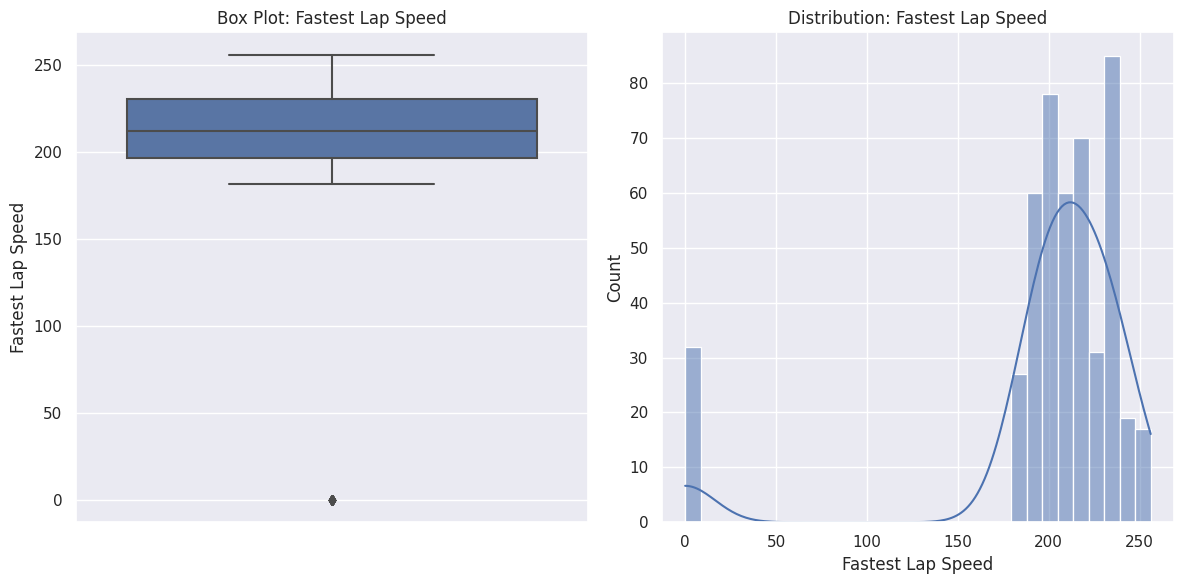

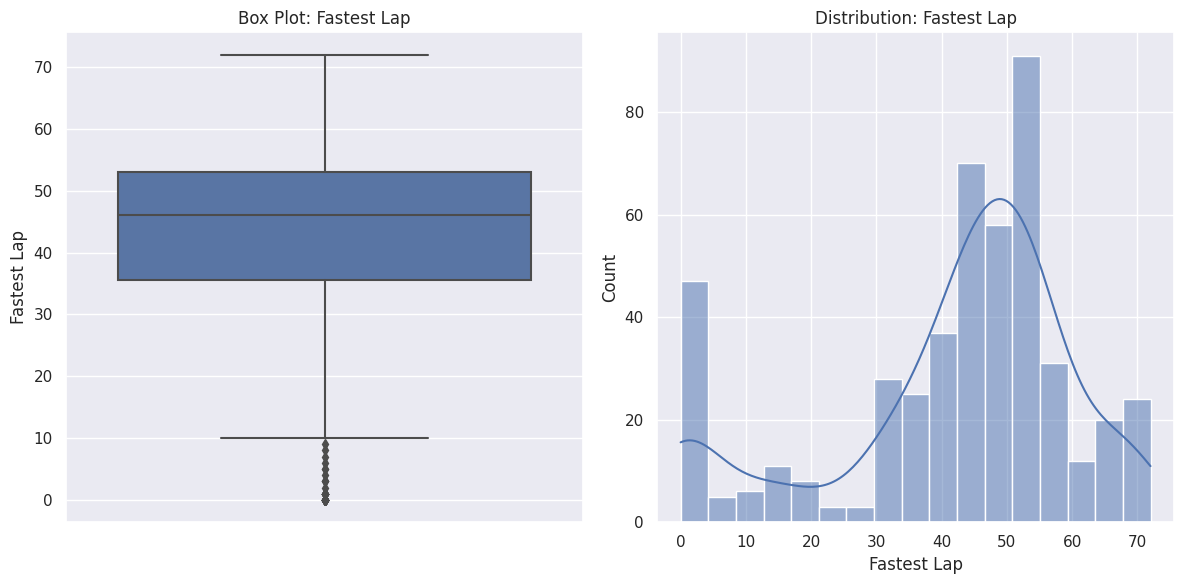

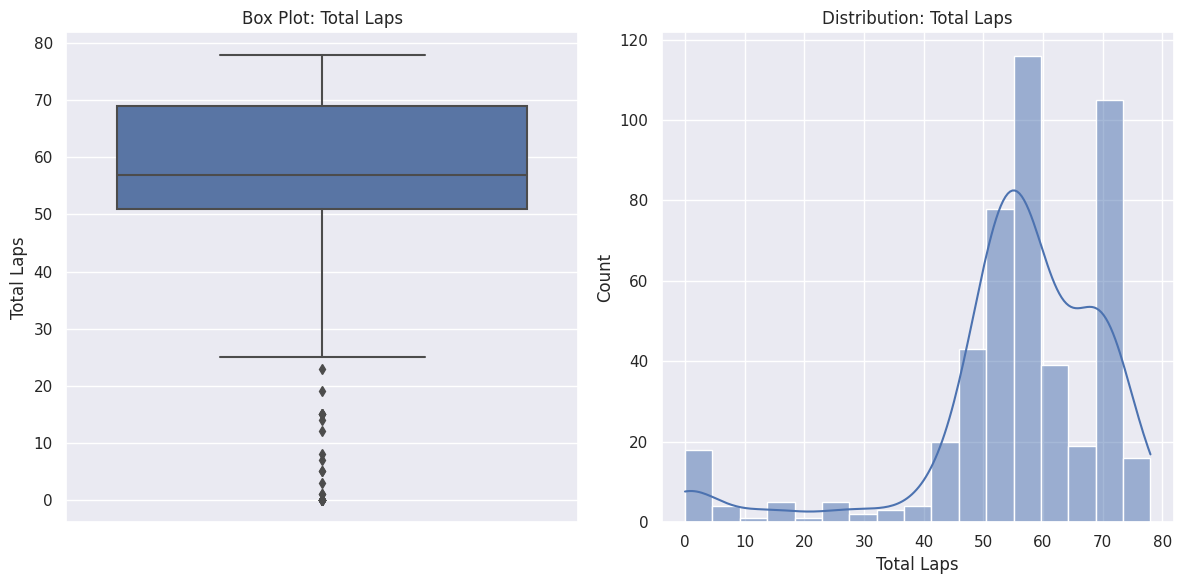

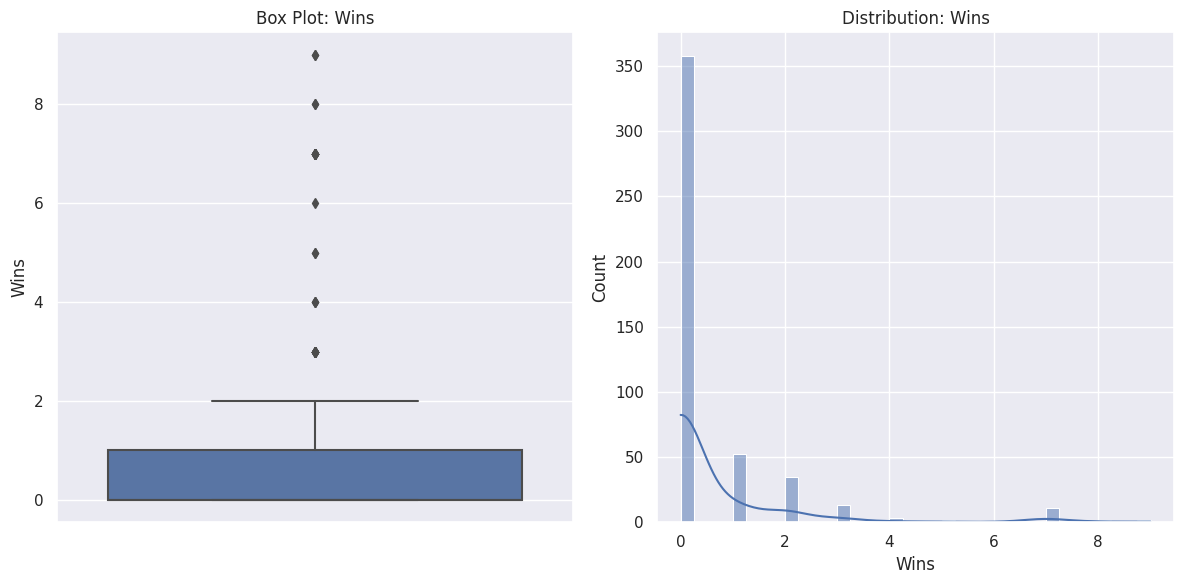

In [80]:
# Visualize outliers for columns flagging outliers
if 'Fastest Lap Speed' in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Box plot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_copy['Fastest Lap Speed'])
    plt.title('Box Plot: Fastest Lap Speed')
    
    # Histogram with KDE to see distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_copy['Fastest Lap Speed'], kde=True)
    plt.title('Distribution: Fastest Lap Speed')
    
    plt.tight_layout()
    plt.show()

if 'Fastest Lap' in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Box plot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_copy['Fastest Lap'])
    plt.title('Box Plot: Fastest Lap')
    
    # Histogram with KDE to see distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_copy['Fastest Lap'], kde=True)
    plt.title('Distribution: Fastest Lap')
    
    plt.tight_layout()
    plt.show()
    
if 'Total Laps' in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Box plot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_copy['Total Laps'])
    plt.title('Box Plot: Total Laps')
    
    # Histogram with KDE to see distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_copy['Total Laps'], kde=True)
    plt.title('Distribution: Total Laps')
    
    plt.tight_layout()
    plt.show()
if 'Wins' in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Box plot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_copy['Wins'])
    plt.title('Box Plot: Wins')
    
    # Histogram With KDE to see distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_copy['Wins'], kde=True)
    plt.title('Distribution: Wins')
    
    plt.tight_layout()
    plt.show()

**CONCLUSION:** 

The statistical results and the boxplot visualization indicate that there are a few outliers in the dataset. 

The total laps shows a range from 0 to 78 total laps - which is capturing the reality of Formula 1 racing where completing all laps is never guaranteed.

Extremely fast outliers might represent exceptional qualifying laps or laps with perfect conditions. Unusually slow outliers could represent laps affected by:
- Damage
- Pit stops
- Safety car periods
- Wet weather conditions
- Mechanical issues

The median (line in the box) for the wins is at or near zero, indicating that most drivers have few or no wins. This win distribution perfectly aligns with the typical structure of Formula 1 competition:
- Only 3-4 drivers typically win races.
- 1-2 dominant drivers often account for the majority of wins.
- Most of the grid (16+ drivers) achieve zero wins.

 Unlike many other datasets, what appears as "statistical outliers" in F1 often represents meaningful competitive realities rather than errors. Therefore, in this case, there is no need to remove the outliers.

### 4.6 Final Modifications

The data from the final DataFrame (`df_copy`) can be exported for future analysis.

In [81]:
# File names
csv_file = 'final_data.csv'
excel_file = 'final_data.xlsx'

# Export to CSV
try:
    df_copy.to_csv(csv_file, index=False)
    print(f"Data exported to {csv_file}")
except PermissionError as e:
    print(f"Permission error while writing to {csv_file}: {e}")

# Export to Excel
try:
    df_copy.to_excel(excel_file, index=False, sheet_name='F1 Performance Data')
    print(f"Data exported to {excel_file}")
except PermissionError as e:
    print(f"Permission error while writing to {excel_file}: {e}")

Data exported to final_data.csv
Data exported to final_data.xlsx


<br>

## 5. Univariate Analysis

Each variable can be examined individually to understand its distribution, central tendency, and variability more clearly. This understanding is crucial for identifying the nature of the data, such as whether it is normally distributed or skewed, which is a crucial step in the data analysis process as it provides a comprehensive understanding of a single variable's purpose and characteristics. 

### 5.1 Categorical Values

Driver
Alexander Albon     24
Lance Stroll        24
Valtteri Bottas     24
Sergio Pérez        24
Pierre Gasly        24
                    ..
Logan Sargeant      14
Franco Colapinto     9
Liam Lawson          6
Oliver Bearman       3
Jack Doohan          1
Name: count, Length: 24, dtype: int64


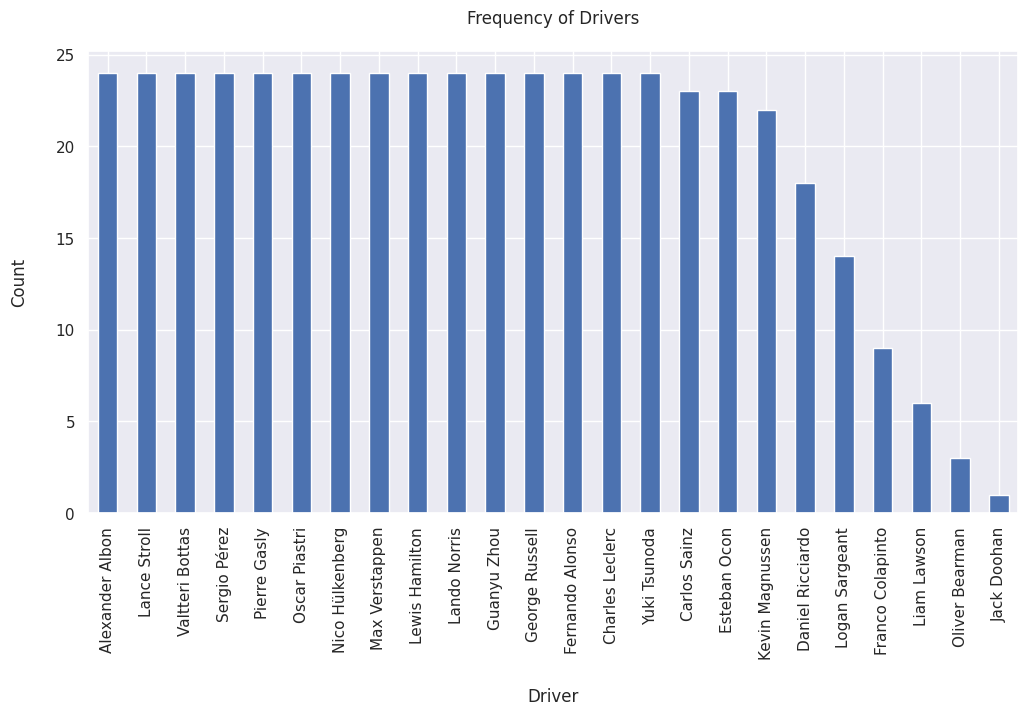

In [82]:
# 'Driver'
cat_counts = df_copy['Driver'].value_counts()
print(cat_counts)
plt.figure(figsize=(12, 6))
cat_counts.plot(kind='bar')
plt.title('Frequency of Drivers', pad=20)
plt.xlabel('Driver', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.xticks(rotation=90)
plt.show()

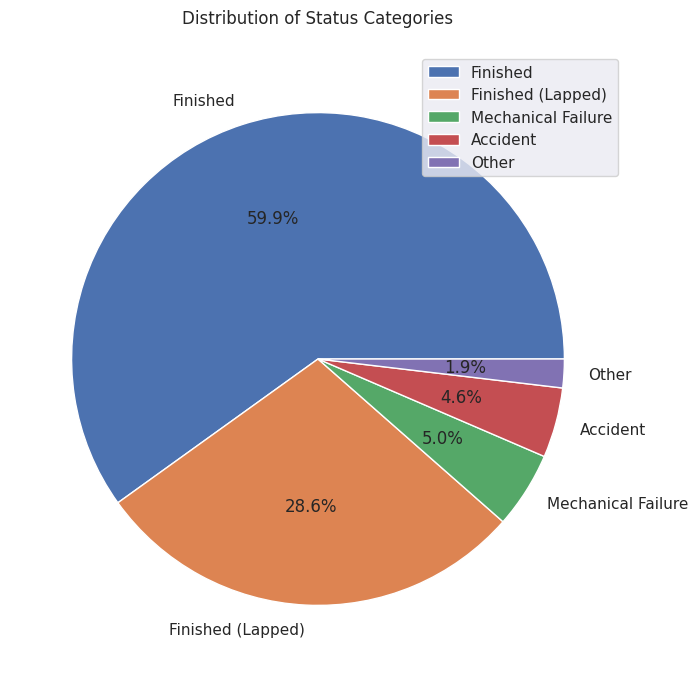

In [83]:
# 'Status'
status_col = df_copy['Status'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(status_col, labels=['Finished', 'Finished (Lapped)', 'Mechanical Failure', 'Accident', 'Other'], autopct='%1.1f%%')
plt.title("Distribution of Status Categories", pad=20)
plt.legend()
plt.show()

Race Name
Abu Dhabi Grand Prix        20
Japanese Grand Prix         20
São Paulo Grand Prix        20
Spanish Grand Prix          20
Singapore Grand Prix        20
                            ..
Bahrain Grand Prix          20
Azerbaijan Grand Prix       20
Austrian Grand Prix         20
United States Grand Prix    20
Australian Grand Prix       19
Name: count, Length: 24, dtype: int64


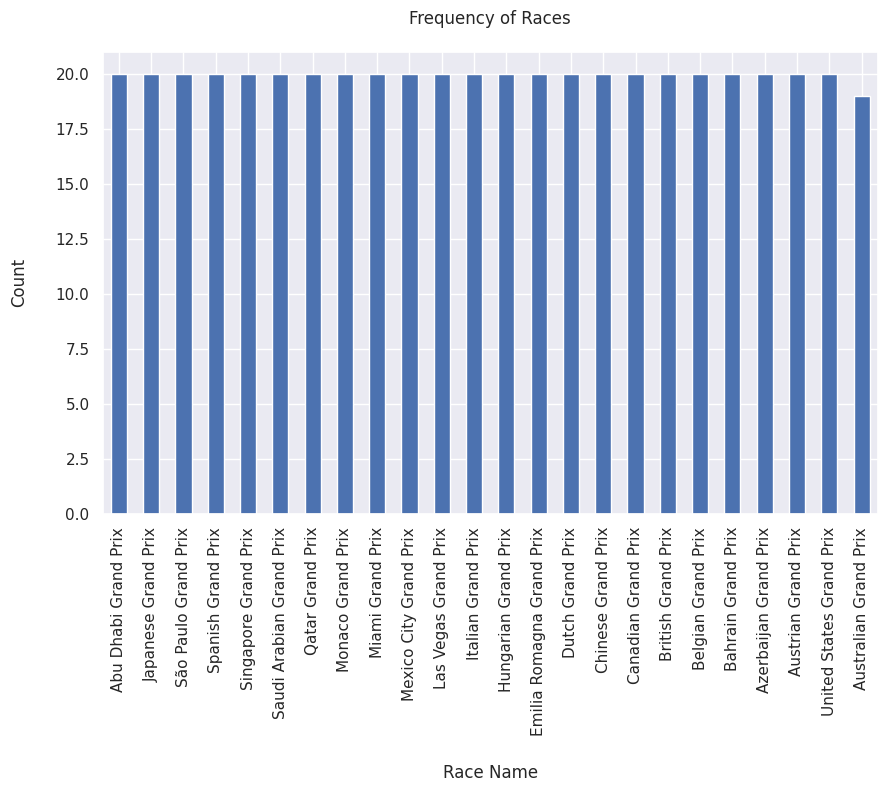

In [84]:
# 'Race Name'
cat_counts = df_copy['Race Name'].value_counts()
print(cat_counts)
plt.figure(figsize=(10, 6))
cat_counts.plot(kind='bar')
plt.title('Frequency of Races', pad=20)
plt.xlabel('Race Name', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.xticks(rotation=90)
plt.show()

Team
Alpine F1 Team    48
Aston Martin      48
Ferrari           48
Haas F1 Team      48
McLaren           48
Mercedes          48
RB F1 Team        48
Red Bull          48
Sauber            48
Williams          47
Name: count, dtype: int64


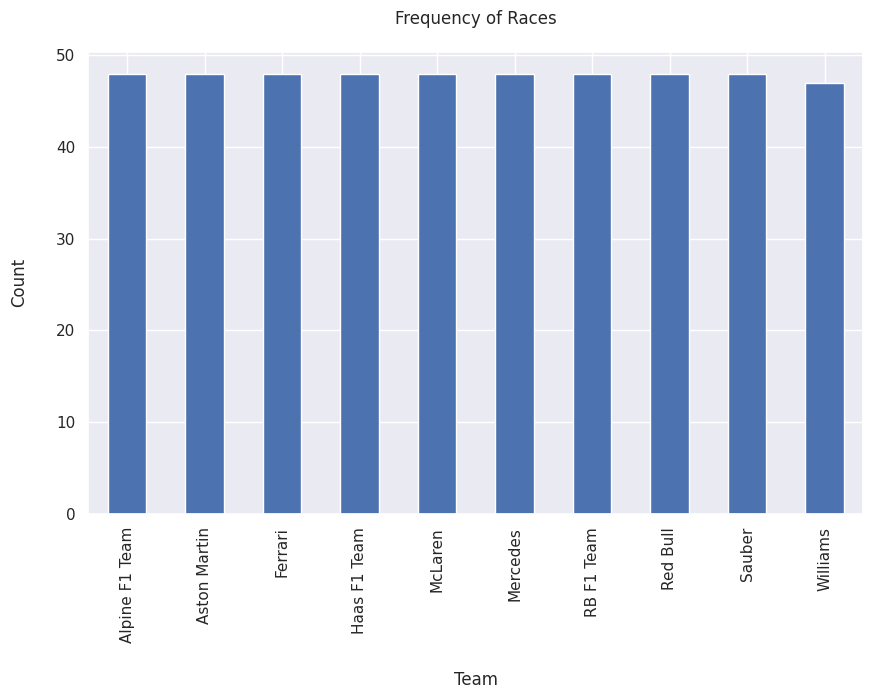

In [85]:
# 'Team'
cat_counts = df_copy['Team'].value_counts()
print(cat_counts)
plt.figure(figsize=(10, 6))
cat_counts.plot(kind='bar')
plt.title('Frequency of Races', pad=20)
plt.xlabel('Team', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.xticks(rotation=90)
plt.show()

**INSIGHTS:** 

**1. `Race Name`:**
- Each race appears to have data for exactly 15 drivers.

- The dataset has a uniform structure where every race has the same number of driver entries.

- All races in the 2024 season (up to the point of data collection) are equally represented.

**2. `Drivers`:**
- These drivers have participated across all races in the dataset, which is 24 times.

- Each driver has equal representation across the dataset, with substitute drivers appearing less than full-time drivers.

**3. `Status`:**
- 63% of the drivers finished the races. 25.6% of drivers finished the race but were overtaken by the leader. The rest did not finish due to accidents, failures, or retirement. 

- These values give insight into both driver and car performance.

- Thus it could help identify further trends in specific types of failures across races or teams.

**4. `Team`:**
- The majority of drivers belong to the Aston Martin, Mercedes, Sauber, McLaren, and Red Bull teams. 

- The distribution of teams could give insight into team dynamics vs. performance and wins, as well as vehicle performance.

- There could be bias based on this majority, but it is due to budget and resources.

- Thus for future analysis, when comparing teams, averages rather than totals will be used.

### 5.2 Numerical Values

`Wins`, `Fastest Lap`, `Fastest Lap Speed` and `Total Laps` was already explored during the outliers section. Thus the focus will be on the remaining values.


Skew of Start Position is:  0.0029337298990330606
Kurtosis of Start Position data is:  -1.1834377368787063
Skew of End Position is:  0.09613603889720336
Kurtosis of End Position data is:  -1.1691663164107233


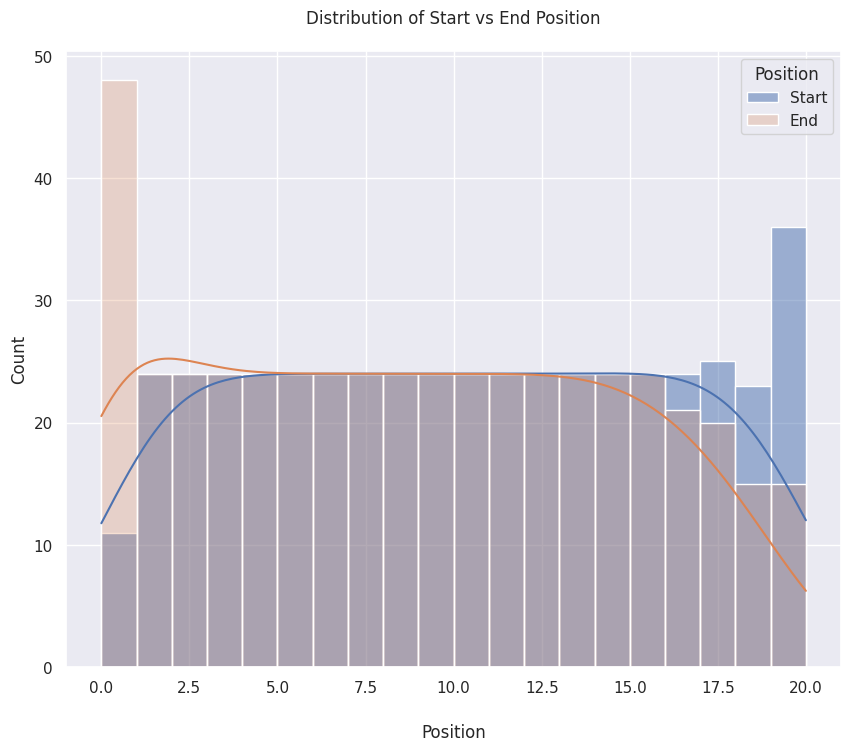

In [86]:
# 'Position'
print("Skew of Start Position is: ", df_copy['Start Position'].skew())
print("Kurtosis of Start Position data is: ", df_copy['Start Position'].kurtosis())
print("Skew of End Position is: ", df_copy['End Position'].skew())
print("Kurtosis of End Position data is: ", df_copy['End Position'].kurtosis())

plt.figure(figsize=(10, 8))
sns.histplot(df_copy['Start Position'], bins=20, kde=True,  label='Start')
sns.histplot(df_copy['End Position'], bins=20, kde=True, alpha=0.25, label='End')
plt.title('Distribution of Start vs End Position', pad=20)
plt.xlabel('Position', labelpad=20)
plt.legend(title='Position', loc='upper right')
plt.show()

Skew of Rank Data is:  0.02430222455176382
Kurtosis of Rank data is:  -1.2011213906442355


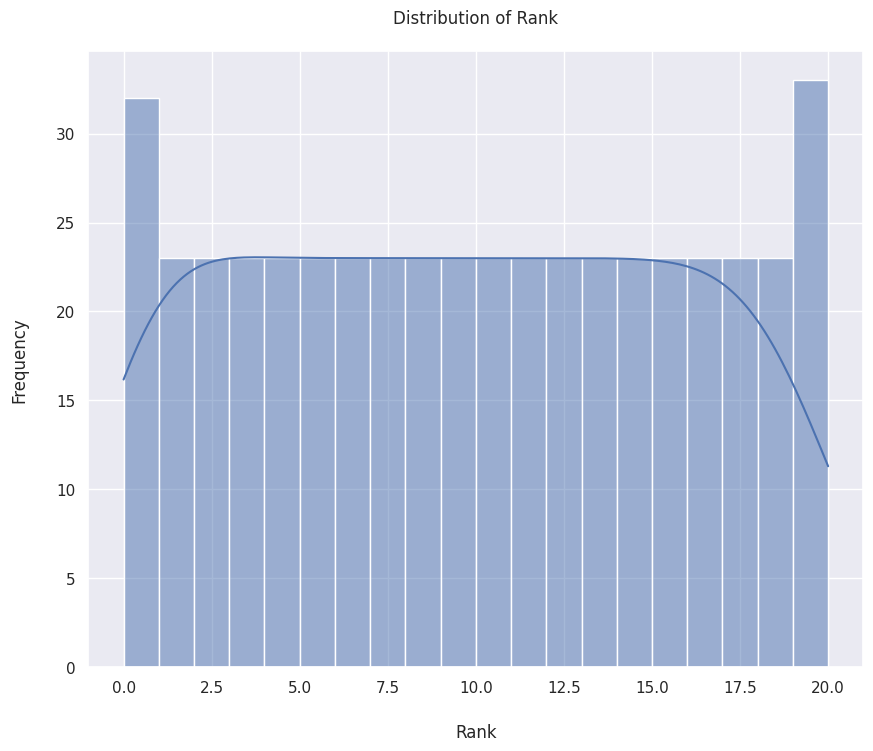

In [87]:
# 'Rank'
print("Skew of Rank Data is: ", df_copy['Rank'].skew())
print("Kurtosis of Rank data is: ", df_copy['Rank'].kurtosis())

plt.figure(figsize=(10, 8))
sns.histplot(df_copy['Rank'], bins=20, kde=True)
plt.title('Distribution of Rank', pad=20)
plt.xlabel('Rank', labelpad=20)
plt.ylabel('Frequency', labelpad=20)
plt.show()

**INSIGHTS:** 

**1. `Rank`:**
- The near-zero skewness (0.02430) suggests that the ranking system is fairly balanced, with ranks distributed almost symmetrically. 

- The negative kurtosis (-1.201) suggests that ranks are spread quite evenly across all possible positions, approaching a uniform distribution. 

- This suggests a competitive field where drivers are spread fairly evenly across the performance spectrum rather than clustered into distinct tiers.

**2. `Position`:**

- The increased positive skew in End Position suggests that races tend to create more opportunities for drivers to finish in better positions than they qualified.

- The slightly higher kurtosis (less negative) for End Position suggests that race results have a bit more concentration around certain positions than qualifying.

- This could indicate that race pace tends to reveal the "true" performance hierarchy more than one-lap qualifying speed.


<br>

## 6. Bivariate Analysis

The relationships between variables can be examined to uncover patterns, correlations, or associations. This will help determine whether there is a statistical relationship between two variables and, if so, the nature and strength of that relationship.

### 6.1 Numerical vs. Numeric

<Figure size 1500x1000 with 0 Axes>

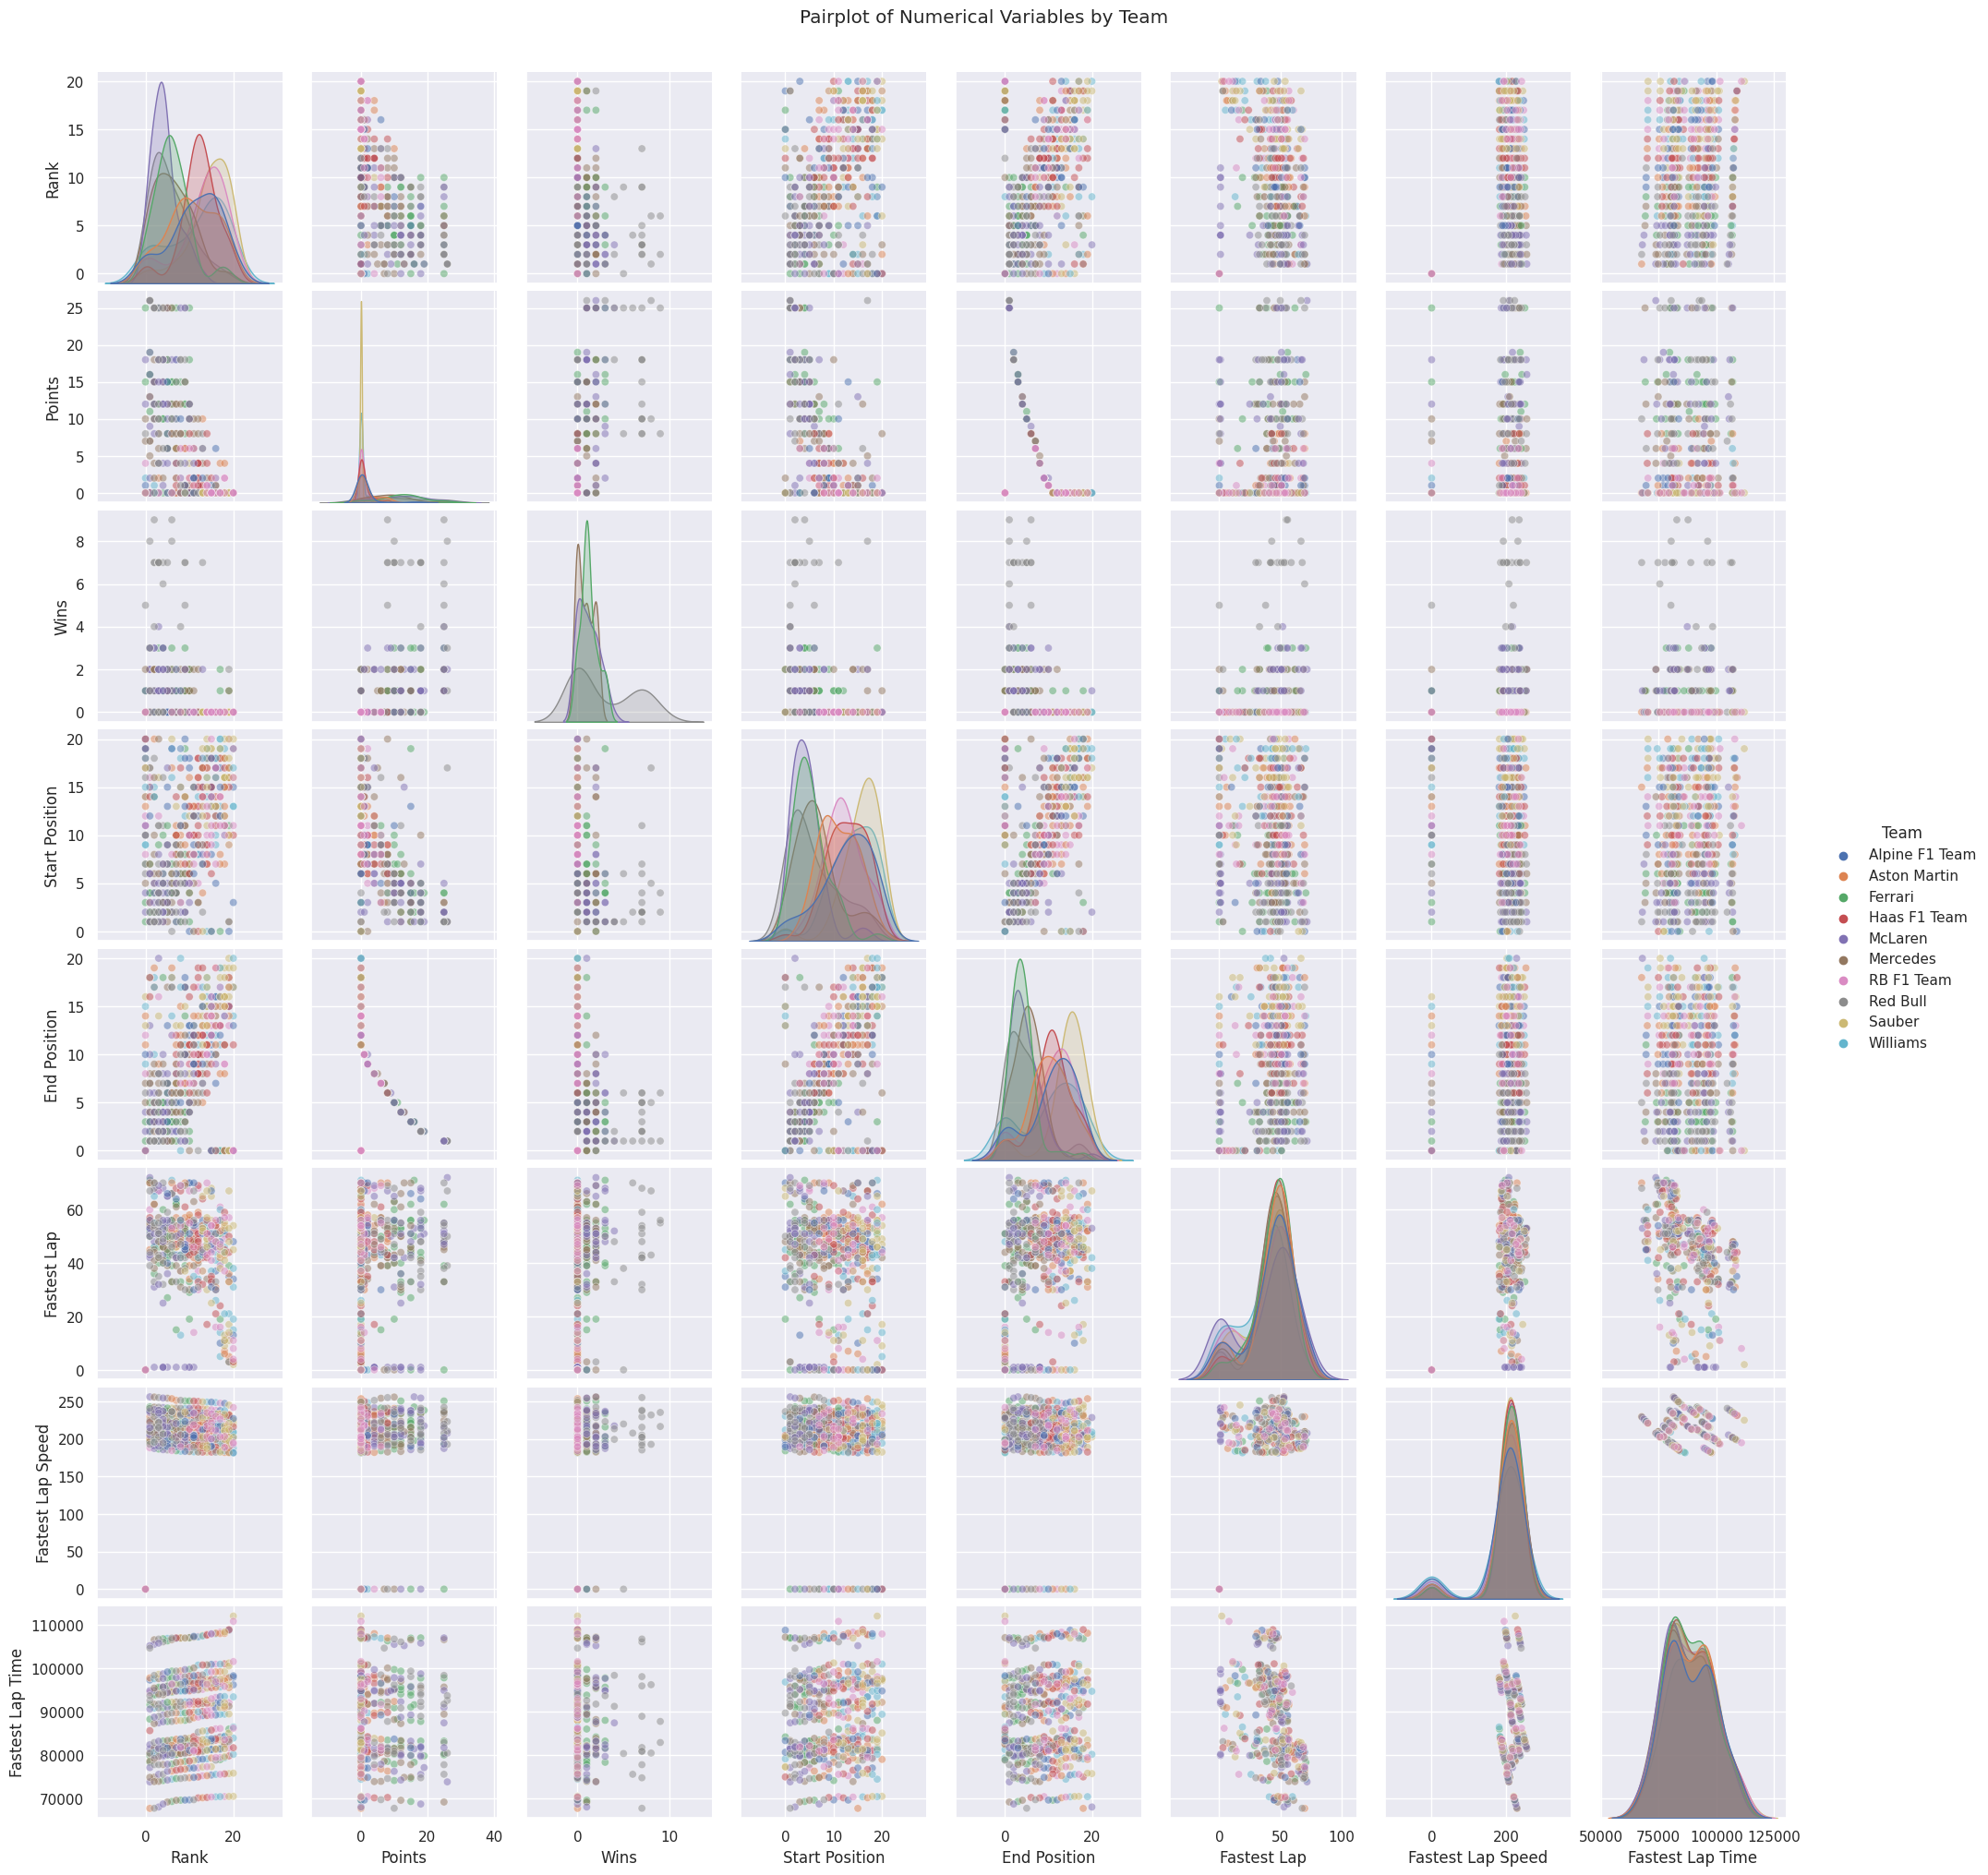

In [88]:
# List of numerical columns
numerical_cols = ['Rank', 'Points', 'Wins', 'Start Position', 'End Position', 'Fastest Lap', 'Fastest Lap Speed', 'Fastest Lap Time']

# Create a pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(
    df_copy,
    hue='Team',  
    vars=numerical_cols,  
    diag_kind='kde',  
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Pairplot of Numerical Variables by Team', y=1.02)
plt.show()

### 6.2 Categorical vs. Categorical

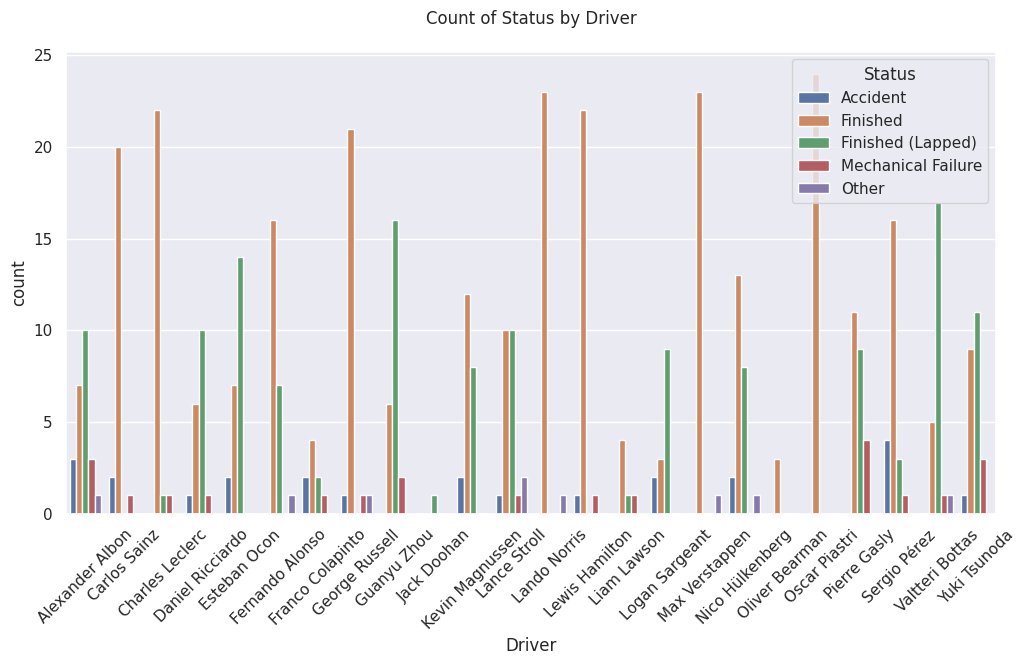

In [89]:
# Count plot for 'Driver' vs 'Status'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='Driver', hue='Status')
plt.title('Count of Status by Driver', pad=20)
plt.xticks(rotation=45)
plt.show()

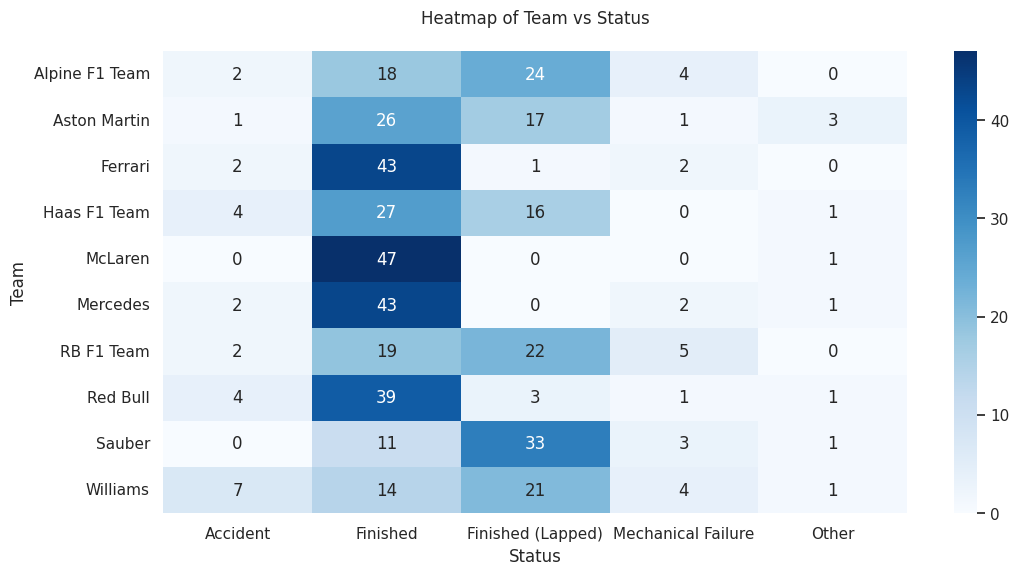

In [90]:
# Cross-tabulation of counts
cross_tab = pd.crosstab(df_copy['Team'], df_copy['Status'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Team vs Status', pad=20)
plt.xlabel('Status')
plt.ylabel('Team')
plt.show()

### 6.3 Numerical vs. Categorical

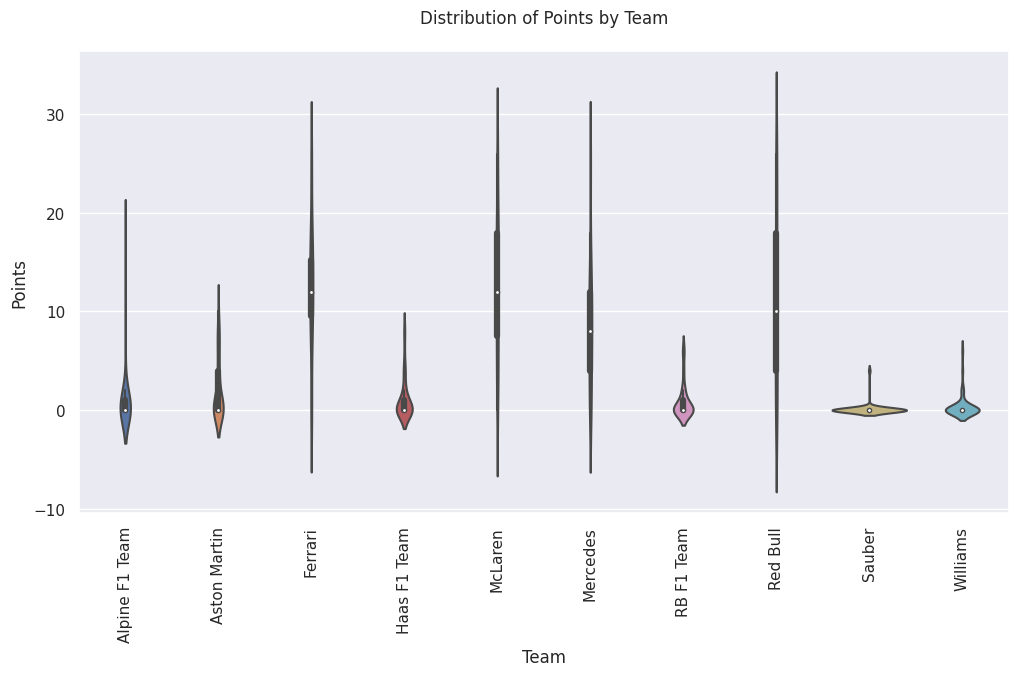

In [91]:
# Violin plot for 'Points' by 'Team'
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_copy, x='Team', y='Points')
plt.title('Distribution of Points by Team', pad=20)
plt.xticks(rotation=90)
plt.show()

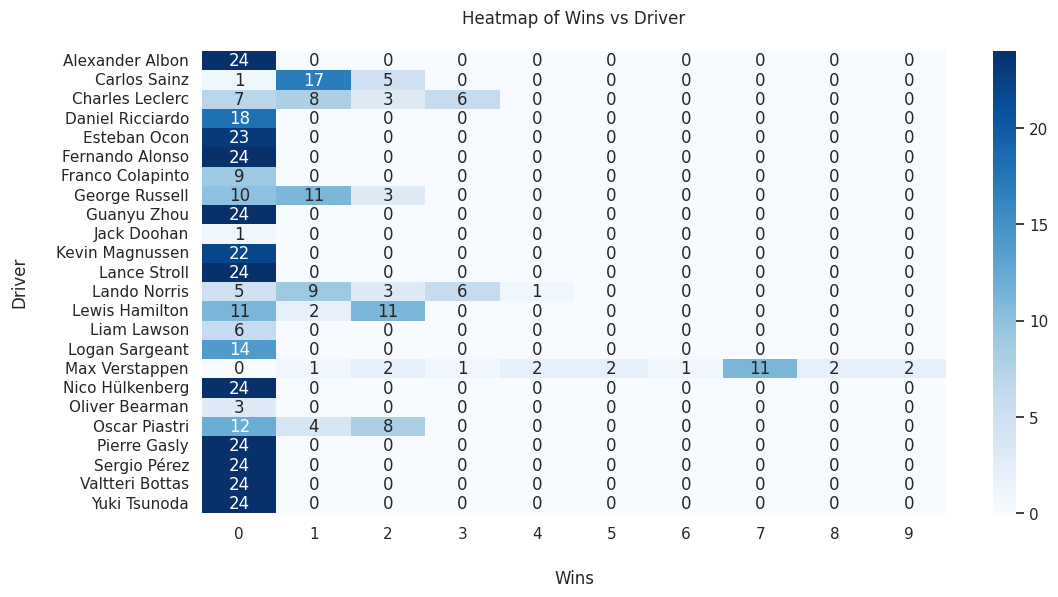

In [92]:
# Cross-tabulation of counts
cross_tab = pd.crosstab(df_copy['Driver'], df_copy['Wins'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Wins vs Driver', pad=20)
plt.xlabel('Wins', labelpad=20)
plt.ylabel('Driver', labelpad=20)
plt.show()

In [93]:
# 'Race Name' and 'Points'
contingency_table = pd.crosstab(df_copy['Race Name'], df_copy['Points'])
display(contingency_table)

Points,0,1,2,4,5,6,7,8,9,10,11,12,13,15,16,18,19,25,26
Race Name,,,,,,,,,,,,,,,,,,,
Abu Dhabi Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
Australian Grand Prix,9,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
Austrian Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
Azerbaijan Grand Prix,10,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
Bahrain Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saudi Arabian Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
Singapore Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
Spanish Grand Prix,10,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0


**INSIGHTS:** 

**1. Driver Performance**

- `Points` vs. `Wins`
    - This relationship helps understand the consistency of a driver's performance. A driver with high points but fewer wins might be consistently finishing in the top positions, while a driver with many wins but fewer points might be more inconsistent.
    - Consistent point-scoring is crucial for championship contention, even if a driver doesn't win many races.
- `Rank` vs. `Points`
    - This relationship shows how starting and ending ranks correlate with points scored. It can indicate the effectiveness of race strategies and the ability to gain positions during a race.
    - Teams might focus on improving qualifying performance or race strategy to maximize points.

**2. Team Performance**

- `Team` vs. `Points`
    - Comparing average points scored by different teams can highlight which teams are performing better overall. It can also reveal the impact of car performance and team strategy.
    - Teams with consistently high points might have better car development and race strategies.
- `Team` vs. `Wins`
    - This relationship shows which teams are more successful in terms of race wins. It highlights the competitive edge of certain teams.
    - Winning races is crucial for team morale and sponsorship, so teams focus on maximizing their chances of victory.

**3. Race Dynamics**

- `Start Position` vs. `End Position`
    - This relationship reveals how starting positions affect final race positions. It can indicate the importance of qualifying performance and the ability to overtake during races.
    - Teams might prioritize qualifying performance or focus on race strategy to improve finishing positions.
- `Fastest Lap` vs. `End Position`
    - Analyzing whether achieving the fastest lap correlates with better finishing positions can indicate the importance of race pace.
    - Teams might focus on optimizing race pace to improve overall performance.

**4. Driver and Team Dynamics**

- `Driver` vs. `Team`
    - Examining how different drivers perform within the same team can highlight the impact of driver skill versus car performance.
    - Teams might focus on driver development or car improvements based on these insights.
- `Driver` vs. `Status`
    - Analyzing the distribution of race statuses (e.g., Finished, Retired) across different drivers can assess reliability and consistency.
    - Teams might focus on improving reliability to ensure more race finishes.

5. **Race Characteristics**

- `Race` vs. `Points`
    - Comparing points scored across different races can identify tracks where certain drivers or teams perform better.
    - Teams might focus on optimizing performance at specific tracks to maximize points.
- `Race` vs. `Status`
    - Investigating if certain tracks have higher rates of retirements or incidents can highlight track-specific challenges.
    - Teams might focus on improving reliability and strategy at challenging tracks.

<br>

## 7. Data Exploration & Visualization

In this section, we will analyze the data using visualizations to address the following questions:

- **1. Overall Performance:**
    - How many points did each driver score over the season?
    - How many races did each driver win?

- **2. Qualifying vs. Race Performance:** 
    - How does a driver's starting position correlate with their finishing position? 
    - What is the average starting and finishing position for each driver? 

- **3. Consistency and Reliability:** 
    - How many races did each driver finish vs. retire? 
    - What is the distribution of race statuses (e.g., Finished, Retired) for each driver? 

- **4. Team Dynamics:** 
    - How do drivers within the same team compare in terms of points and wins?
    - Which teams have the most consistent driver pairings?
        
- **5. Race-Specific Performance:** 
    - Which tracks or races did each driver perform best at?
    - How does driver performance vary across different types of tracks (e.g., street circuits vs. traditional tracks)?

- **6. Strategic Insights**
    - How often did drivers achieve the fastest lap, and how does this correlate with their finishing position?
    - What is the correlation between pit stop strategies and race outcomes for each driver?

### 7.1. Overall Performance

***How many points did each driver score over the season?***

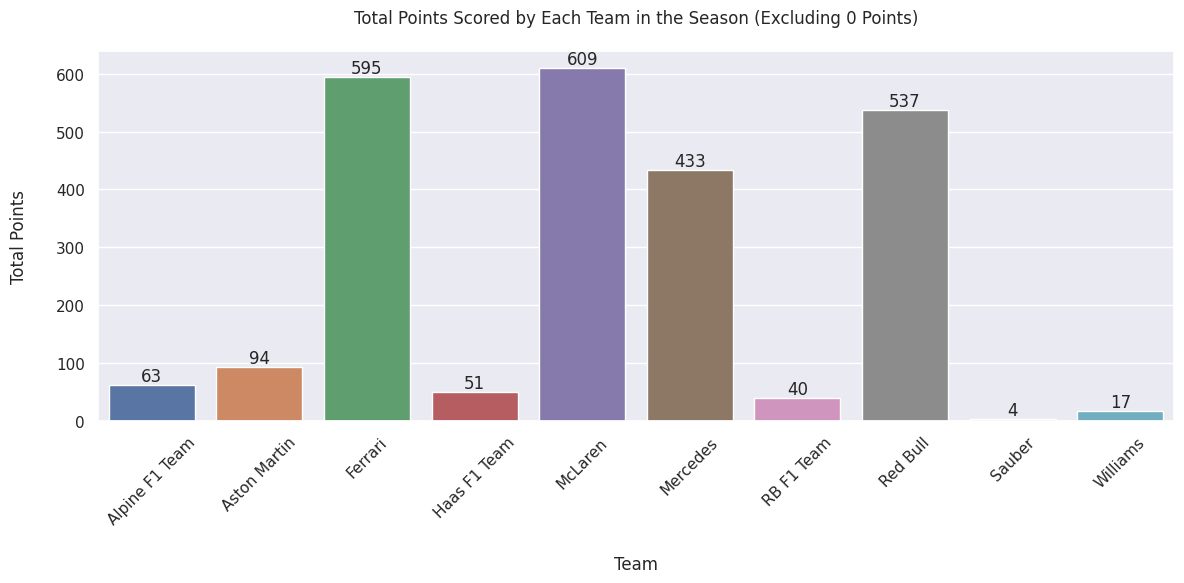

In [94]:
# Aggregate points by driver
driver_points = df_copy.groupby(['Driver', 'Team', 'Role'])['Points'].sum().reset_index()

# Create the bar chart
fig = px.bar(
    driver_points,
    x='Driver',
    y='Points',
    title='Total Points Scored by Each Driver in the Season (Excluding 0 Points)',
    text='Points',
    hover_data={'Team': True, 'Role': True},
    labels={'Points': 'Total Points', 'Driver': 'Driver'}
)

# Customize layout
fig.update_layout(
    xaxis_title="Driver",
    yaxis_title="Total Points",
    xaxis_tickangle=45,
    template="plotly_white"
)

# Show the figure
fig.show(renderer='iframe')


# Aggregate points by team
team_points = df_copy.groupby('Team')['Points'].sum().reset_index()

# Plot data
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_points, x='Team', y='Points', ci=None)
plt.title('Total Points Scored by Each Team in the Season (Excluding 0 Points)', pad=20)
plt.xlabel('Team', labelpad=20)
plt.ylabel('Total Points', labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

**INSIGHTS:** 

An examination of the team and driver points reveals several key points:

- McLaren had the highest total points, thanks to strong performances from both Lando Norris and Oscar Piastri. This indicates a well-rounded team performance with both drivers contributing significantly.

- Ferrari secured the second most points, with a notable contribution from substitute driver Carlos Sainz, who added 262 points to the team's total. This highlights Ferrari's strategic use of substitute drivers to maintain competitiveness.

- Red Bull, with Max Verstappen as the standout performer, secured the third most points. Verstappen's dominance was evident, contributing 399 points, while his teammate Sergio Perez scored 138 points. This underscores Red Bull's competitive edge, heavily reliant on Verstappen's performance.

- Mercedes scored 433 points, indicating a competitive performance but falling short of McLaren and Red Bull. The significant gap in points between the top teams and the rest highlights challenges faced by other teams in terms of car development, strategy, or driver performance.

- The remaining teams scored below 100 points, indicating a significant performance gap compared to the top teams.

- The significant gap in points between the top teams/drivers and the rest indicates challenges faced by other teams in terms of car development, strategy, or driver performance.


***How many races did each driver win?***

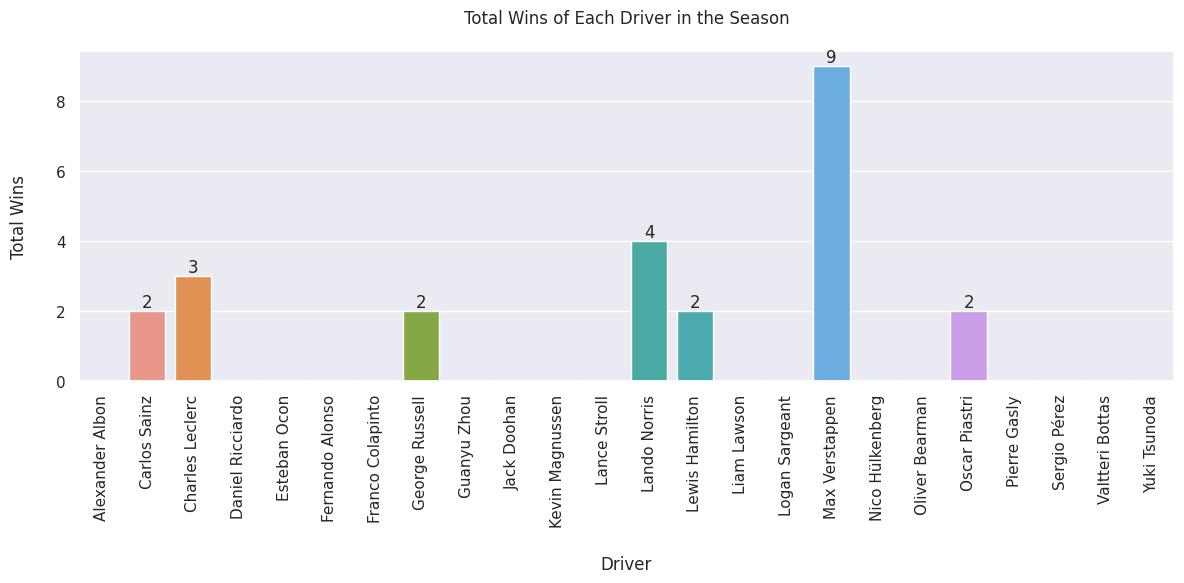

In [95]:
# Calculate the difference in wins for each driver
df_copy['Win_Difference'] = df_copy.groupby('Driver')['Wins'].diff().fillna(df_copy['Wins'])

# Aggregate the win differences by driver
driver_wins = df_copy.groupby('Driver')['Win_Difference'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=driver_wins, x='Driver', y='Win_Difference', ci=None)
plt.title('Total Wins of Each Driver in the Season', pad=20)
plt.xlabel('Driver', labelpad=20)
plt.ylabel('Total Wins', labelpad=20)
plt.xticks(rotation=90)

# Annotate the bars with integer values
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate total wins for each driver per team
driver_team_wins = df_copy.groupby(['Team', 'Driver'])['Win_Difference'].sum().reset_index()

# Aggregate to get total wins per team
team_wins = driver_team_wins.groupby('Team')['Win_Difference'].sum().reset_index()

# Create hover text
driver_wins_dict = driver_team_wins.groupby('Team').apply(lambda x: dict(zip(x['Driver'], x['Win_Difference']))).to_dict()

hover_texts = []
for team in team_wins['Team']:
    drivers_wins = driver_wins_dict[team]
    text = f"<b>{team}</b><br>" 
    for driver, wins in drivers_wins.items():
        text += f"{driver}: {wins} wins<br>"
    hover_texts.append(text)

# Create bar plot
fig = go.Figure(data=[go.Bar(x=team_wins['Team'], y=team_wins['Win_Difference'],
                             hovertext=hover_texts,
                             hoverinfo="text")])

# Customize layout
fig.update_layout(title='Total Wins by Team with Driver Contributions',
                  xaxis_title='Team',
                  yaxis_title='Total Wins')

fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the team and driver wins reveals several key points:

- Red Bull had the most wins, all attributed to Max Verstappen, who secured 9 victories. This highlights Verstappen's dominance and Red Bull's strong performance throughout the season.

- Mercedes had two drivers, Lewis Hamilton and George Russell, each securing two wins. This indicates a balanced performance within the team, with both drivers contributing to the team's success.

- McLaren had two winners: Lando Norris, with 4 wins, and Oscar Piastri. This shows McLaren's competitive edge and the ability of both drivers to secure victories.

- Ferrari had one winner, Charles Leclerc, who achieved 3 wins. This highlights Leclerc's capability to compete at the top level and contribute significantly to Ferrari's performance.

- The rest of the teams did not have any winners, indicating a gap in performance compared to the top teams.

- The insights suggest that Red Bull, Mercedes, McLaren, and Ferrari were the most competitive teams, with multiple drivers capable of winning races. This reflects strong team dynamics and more effective car performance. For future analysis, it might be beneficial to further explore driver routines, car dynamics, and team management to understand the factors contributing to these successes.

### 7.2. Qualifying vs. Race Performance

***How does a driver's starting position correlate with their finishing position?***

In [96]:
# Filter out rows where Start Position or End Position is 0 (DNF)
filtered_df = df_copy[(df_copy['Start Position'] != 0) & (df_copy['End Position'] != 0)]

# Create the scatter plot
fig = px.scatter(
    filtered_df,
    x='End Position',
    y='Start Position',
    hover_data=['Driver', 'Race Name'],
    title='Correlation of Starting vs Finishing Position',
    labels={'End Position': 'Finishing Position', 'Start Position': 'Starting Position'},
    trendline="ols"
)

fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the driver start and end positions reveals several key points:

- Drivers starting near the front of the grid (positions 1-7) typically finish near the front. Starting with an advantageous grid position often leads to a better finishing position.

- Drivers starting further back (position 8 onwards) usually face an uphill battle to reach the top positions, although improvements in position are possible.

- While it's more common for drivers to finish close to where they started, exceptions exist. Skilled drivers or those with strategic advantages may overcome a poor starting position, like Max Verstappen's notable drive from 17th to 1st.

- Starting from a frontal position might allow drivers to avoid early-race incidents that often occur at the front. Additionally, these drivers might benefit from alternative strategies, such as different tire choices or pit stop timings.

- Exceptional performances, like those of Max Verstappen, emphasize the importance of driver skill and strategic execution. Such drivers can capitalize on race conditions and team strategies to achieve remarkable results.

- Although there are exceptions, the general trend in F1 races indicates a strong correlation between starting and finishing positions. Better starting positions tend to increase the likelihood of better performance and enhance the chances of winning.

***What is the average starting and finishing position for each driver?***

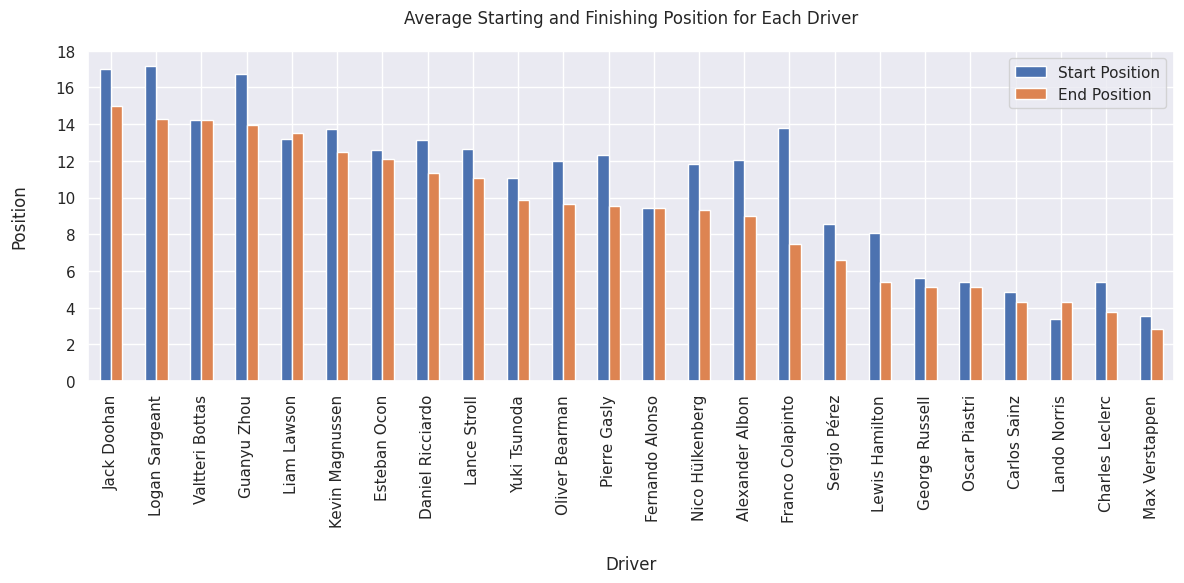

In [97]:
# Average starting and finishing positions for each driver
avg_positions = df_copy.groupby('Driver')[['Start Position','End Position']].mean()
avg_positions['Start Position'] = avg_positions['Start Position']
avg_positions = avg_positions.sort_values(by='End Position', ascending=False)
avg_positions.plot(kind='bar', figsize=(12, 6))
plt.title('Average Starting and Finishing Position for Each Driver', pad=20)
plt.xlabel('Driver', labelpad=20)
plt.ylabel('Position', labelpad=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**INSIGHTS:** 

An examination of the average driver start and end positions reveals several key points:

- Drivers with more victories in the season, such as Carlos Sainz and Max Verstappen, typically start in the front grid positions (positions 2-4) and often finish in these positions, resulting in wins.

- Conversely, drivers with less favorable performance or luck, like Valtteri Bottas, generally start in more rearward positions (position 10 and beyond) and tend to finish in similar positions.

- An exception to this trend is Franco Colapinto, who, despite starting races on average in position 13, managed to achieve an average finishing position of 7.

- Although there are exceptions, the general trend in F1 races indicates a strong correlation between starting and finishing positions. Better starting positions tend to increase the likelihood of better performance and enhance the chances of winning.

### 7.3. Consistency and Reliability
***How many races did each driver finish vs. retire?***

In [98]:
import plotly.graph_objects as go

# Calculate finishes and retirements
finishes_retirements = df_copy.groupby('Driver')['Status'].apply(lambda x: (x == 'Finished').sum()).reset_index(name='Finished')
finishes_retirements['Retired'] = df_copy.groupby('Driver')['Status'].apply(lambda x: ((x != 'Finished') & (x != 'Finished (Lapped)')).sum()).reset_index(name='Retired')['Retired']

# Add wins and points to the DataFrame
finishes_retirements['Wins'] = df_copy.groupby('Driver')['Win_Difference'].sum().reset_index(name='Win_Difference')['Win_Difference']
finishes_retirements['Points'] = df_copy.groupby('Driver')['Points'].first().reset_index(name='Points')['Points']

# Get unique role for each driver (assuming roles are consistent)
driver_roles = df_copy.groupby('Driver')['Role'].first().reset_index()

# Merge driver roles into finishes_retirements DataFrame
finishes_retirements = pd.merge(finishes_retirements, driver_roles, on='Driver')

# Create the stacked bar chart with custom hover text
fig = go.Figure(data=[
    go.Bar(
        name='Finished',
        x=finishes_retirements['Driver'],
        y=finishes_retirements['Finished'],
        customdata=finishes_retirements[['Role', 'Wins', 'Points']],
        hovertemplate='<b>%{x}</b><br>Finished: %{y}<br>Role: %{customdata[0]}<br>Wins: %{customdata[1]}<br>Points: %{customdata[2]}<extra></extra>'
    ),
    go.Bar(
        name='Retired',
        x=finishes_retirements['Driver'],
        y=finishes_retirements['Retired'],
        customdata=finishes_retirements[['Role', 'Wins', 'Points']],
        hovertemplate='<b>%{x}</b><br>Retired: %{y}<br>Role: %{customdata[0]}<br>Wins: %{customdata[1]}<br>Points: %{customdata[2]}<extra></extra>'
    )
])

fig.update_layout(
    title='Number of Finishes vs. Retirements for Each Driver',
    xaxis_title='Driver',
    yaxis_title='Number of Races',
    barmode='stack',
    height=600,
)
fig.show(renderer='iframe')


**INSIGHTS:** 

An examination of the driver and race completion reveals several key points:

- Max Verstappen finished 23 out of 24 races, showcasing his consistency and reliability as a driver. He is the champion of the F1 Championship.

- Oscar Piastri was the only driver to finish all races in the season, winning two of them. This highlights his ability to consistently complete races and achieve victories.

- Many drivers who finished less than 10 races and retired from the rest had 0 wins, indicating struggles with car reliability, strategy or performance.

- The struggles of drivers who frequently retire from races highlight the performance disparity in F1. Teams and drivers facing reliability issues may need to focus on improving car performance and strategic execution.

***What is the distribution of race statuses (e.g., Finished, Retired) for each driver?***

In [99]:
# Calculate the distribution of race statuses
status_distribution = df_copy.groupby(['Driver', 'Status']).size().unstack(fill_value=0)
drivers = status_distribution.index.tolist()
statuses = status_distribution.columns.tolist()

# Create the stacked bar chart
fig = go.Figure()
for status in statuses:
    fig.add_trace(go.Bar(name=status, x=drivers, y=status_distribution[status]))
fig.update_layout(
    title='Distribution of Race Statuses for Each Driver',
    xaxis_title='Driver',
    yaxis_title='Number of Races',
    barmode='stack',
    height = 600,
)
fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the driver and race statuses reveals several key points:

- Drivers with more "Finished" bars in the graph are considered more reliable and consistent in completing races.

- A long "Finished" bar coupled with a short "Retired" bar suggests a driver who is likely more reliable, indicating fewer retirements due to mechanical failures or accidents.

- Most mechanical failures occurred towards the end of the racing season. This could be due to increased wear and tear on the vehicles as the season progresses, or perhaps due to more aggressive strategies as teams push for final standings.

- Most accidents occurred during the first few races. This might be attributed to drivers adjusting to new cars, teams, or regulations at the start of the season, leading to a higher likelihood of incidents.

- The increase in mechanical failures towards the end of the season highlights the importance of vehicle maintenance and strategic planning. Teams should focus on ensuring vehicle reliability throughout the season to avoid late-season retirements.

- The increase in mechanical failures towards the end of the season highlights the importance of vehicle maintenance and strategic planning. Teams should focus on ensuring vehicle reliability throughout the season to avoid late-season retirements.


### 7.4. Team Dynamics
***How do drivers within the same team compare in terms of points and wins?***

In [100]:
# Calculate total points and wins for each driver
df_copy['Win_Difference'] = df_copy.groupby('Driver')['Wins'].diff().fillna(df_copy['Wins'])

driver_summary = df_copy.groupby('Driver').agg({'Points': 'max', 'Win_Difference': 'sum', 'Team': 'first', 'Role': 'first'}).reset_index()

# Compare drivers within the same team
def compare_drivers_within_team(df):
    teams = df['Team'].unique()
    team_strings = []
    for team in teams:
        team_df = df[df['Team'] == team].sort_values(by='Points', ascending=False)
        team_string = f"<b>Team: {team}</b><br>"  # Use HTML bold for team name
        for index, row in team_df.iterrows():
            team_string += f"  Driver: {row['Driver']}, Role: {row['Role']}, Points: {row['Points']}, Wins: {row['Win_Difference']}<br>"
        team_strings.append(team_string)
    return team_strings

team_summary = compare_drivers_within_team(driver_summary)

# Create the plot using go.Figure
fig = go.Figure(data=[go.Table(
    header=dict(values=["Team Comparison"]),
    cells=dict(values=[team_summary], align="left")
)])
fig.update_layout(
    title='Comparison of Drivers Within Each Team',
    margin=dict(l=5, r=5, b=10, t=50, pad=4)
)
fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the driver and team comparison reveals several key points:

- Lando Norris from McLaren and Max Verstappen have the highest points, with 26 each. Norris has 4 wins, while Verstappen has 9 wins. This highlights their strong performance and ability to consistently secure top positions in races.

- George Russell and Lewis Hamilton from Mercedes both scored 25 points and achieved 2 wins each. This indicates a balanced performance within the team, with both drivers contributing significantly to the team's success.

- Several drivers have 0 wins and low points ranging from 4 to 10. This suggests challenges in achieving top finishes, which could be due to various factors such as car performance, team strategy, or driver skill.

- Ferrari has performed well by leveraging both substitute drivers and a full-time driver, demonstrating adaptability and strategic depth in their lineup.

- The presence of drivers with low points and no wins indicates a performance gap. Teams and drivers facing these challenges may need to focus on improving car performance, strategic execution, and driver development.

***Which teams have the most consistent driver pairings?***

In [101]:
# Calculate the difference in points for each driver
df_copy['Point_Difference'] = df_copy.groupby('Driver')['Points'].diff().fillna(df_copy['Points'])

# Aggregate points by team and driver
team_driver_points = df_copy.groupby(['Team', 'Driver'])['Point_Difference'].sum().reset_index()

# Calculate the range of points within each team
team_points_range = team_driver_points.groupby('Team')['Point_Difference'].agg(np.ptp).sort_values()

# Convert team_points_range to a DataFrame for Plotly
team_points_df = team_points_range.reset_index()
team_points_df.columns = ['Team', 'Point Range']  # Rename columns for clarity

# Create the Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Team', 'Point Range']),
    cells=dict(values=[team_points_df['Team'], team_points_df['Point Range']])
)])
fig.update_layout(
    title='Teams with Most Consistent Driver Pairings (Smallest Range of Points)',
    margin=dict(l=5, r=5, b=10, t=50, pad=4)
)
fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the team vs. driver pairing reveals several key points:

- McLaren demonstrates a strong and consistent driver pairing, indicated by the smallest range of points (25). This suggests that both drivers are performing at a similar level, contributing evenly to the team's success.

- These teams also exhibit relatively consistent driver pairings, indicating balanced contributions from their drivers. This balance can be advantageous in the constructors' championship, where consistent performance from both drivers is crucial.

- These teams have the least consistent driver pairings, with a point range of 0. This suggests a significant disparity in performance between the drivers, which could impact the team's overall competitiveness.

- These teams fall into an average range of driver pairing consistency. This indicates that while there may be some disparity in driver performance, it is not as pronounced as in the least consistent teams.

- Consistent driver pairings, as seen in McLaren, Ferrari, Mercedes, and Red Bull, can lead to a more stable and competitive team performance. This consistency helps in accumulating points steadily throughout the season.

- Teams with average consistency, such as Aston Martin, Haas, and Alpine, may benefit from focusing on strategies that enhance the performance of their lower-scoring drivers to achieve a more balanced contribution.

### 7.5. Race-Specific Performance:
***Which tracks or races did each driver perform best at?***

In [102]:
# Find the track where each driver performed best
driver_best_track = df_copy.groupby(['Driver'])[['Points']].max().reset_index()

# Merge best tracks into the main dataframe
df_copy_best = pd.merge(df_copy, driver_best_track, on=['Driver', 'Points'], how='inner')

# Create the Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Driver', 'Race Name', 'Points']),
    cells=dict(values=[df_copy_best['Driver'], df_copy_best['Race Name'].sort_values(ascending=False), df_copy_best['Points'].sort_values(ascending=False)])
)])

fig.update_layout(
    title='Races Where Each Driver Performed Best',
    margin=dict(l=5, r=5, b=10, t=50, pad=4)
)

fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the races vs. driver performance reveals several key points:
- The São Paulo and Saudi Arabian Grand Prix appear to be locations where many drivers achieved their best performance. This could be due to various factors such as track characteristics, weather conditions, or team strategies that align well with these circuits.

- Yuki Tsunoda and Valtteri Bottas did not perform well at the Sao Paulo and Saudi Arabian Grand Prix, indicating struggles across various tracks. This might suggest difficulties in adapting to the specific demands of these circuits or issues with car setup and strategy.

- Teams that consistently perform well at specific tracks may have developed effective strategies that leverage their strengths. Analyzing these strategies can provide insights into how to replicate success at similar circuits.


***How does driver performance vary across different types of tracks (e.g., street circuits vs. traditional tracks)?***

In [103]:
# Define track types
street_circuits = ['Monaco', 'Singapore', 'Baku', 'Las Vegas', 'Miami', 'Jeddah']
traditional_tracks = ['Silverstone', 'Spa', 'Monza', 'Suzuka', 'Interlagos', 'Albert Park']
other_tracks = ['Bahrain', 'Imola', 'Montreal', 'Barcelona', 'Spielberg', 'Budapest', 'Zandvoort', 'Monza', 'Baku', 'Austin', 'Mexico City', 'São Paulo', 'Losail', 'Yas Marina', 'Shanghai']

# Categorize tracks based on the provided list
def categorize_track(race_name):
    if any(track.lower() in race_name.lower() for track in street_circuits):
        return 'Street Circuit'
    elif any(track.lower() in race_name.lower() for track in traditional_tracks):
        return 'Traditional Track'
    elif any(track.lower() in race_name.lower() for track in other_tracks):
        return 'Other'
    else:
        return 'Uncategorized'

# Apply the categorization function
df_copy['Track Type'] = df_copy['Race Name'].apply(categorize_track)

# Calculate average driver performance across track types
driver_performance = df_copy.groupby(['Driver', 'Track Type'])['Points'].mean().reset_index()

# Create the bar plot using Plotly Express
fig = px.bar(
    driver_performance,
    x="Driver",
    y="Points",
    color="Track Type",
    barmode="group",
    title="Average Driver Performance Across Different Track Types",
    labels={"Points": "Average Points", "Driver": "Driver", "Track Type": "Track Type"}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the race track type vs. driver performance reveals several key points:
- Most drivers tend to perform best on circuit tracks. These tracks are likely well-known to drivers and teams, allowing for optimized strategies and setups that enhance performance.

- The "Other" and "Uncategorized" track types show more variability in driver performance. This could be due to unfamiliarity, unique track characteristics, or less data available for strategic planning.

- The best-performing drivers excel on traditional tracks, which are often well-established circuits with consistent characteristics. These tracks may suit the driving styles and car setups of top drivers.

- Yuki Tsunoda and Valtteri Bottas show consistent struggles across different track types, indicating broader performance issues that may not be limited to specific tracks.

- Drivers and teams often perform better on traditional and circuit tracks due to familiarity and the ability to prepare effectively. This preparation includes optimizing car setups and developing race strategies tailored to the track.


### 7.6. Strategic Insights
***How often did drivers achieve the fastest lap, and how does this correlate with their finishing position?***

Correlation between Number of Fastest Laps and Finishing Position: -0.19
Correlation between Number of Fastest Lap Speed and Finishing Position: 0.19


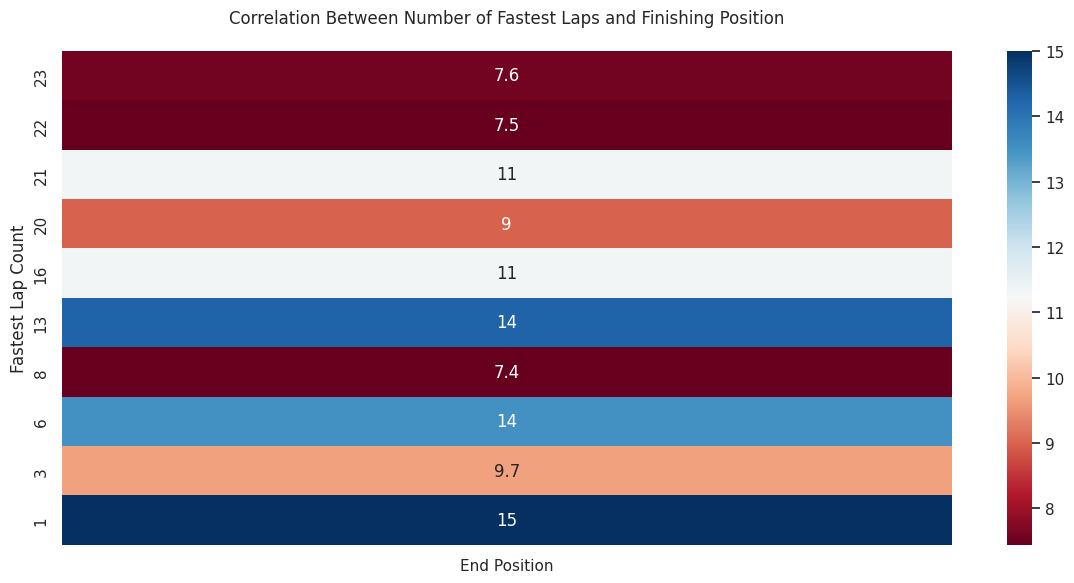

In [104]:
# Convert 'Fastest Lap' to boolean (True if the driver achieved the fastest lap, False otherwise)
df_copy['Fastest Lap Achieved'] = df_copy['Fastest Lap'] > 0

# Count how often each driver achieved the fastest lap
fastest_lap_counts = df_copy.groupby('Driver')['Fastest Lap Achieved'].sum().reset_index()
fastest_lap_counts.rename(columns={'Fastest Lap Achieved': 'Fastest Lap Count'}, inplace=True)

# Merge the fastest lap counts with the original dataframe
df_copy = pd.merge(df_copy, fastest_lap_counts, on='Driver', how='left')

# Calculate the correlation between the number of fastest laps and the finishing position
correlation = df_copy['Fastest Lap Count'].corr(df_copy['End Position'])
print(f"Correlation between Number of Fastest Laps and Finishing Position: {correlation:.2f}")
correlation = df_copy['Fastest Lap Speed'].corr(df_copy['End Position'])
print(f"Correlation between Number of Fastest Lap Speed and Finishing Position: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
pivot_table = df_copy.pivot_table(values='End Position', index='Fastest Lap Count', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='RdBu')
plt.title('Correlation Between Number of Fastest Laps and Finishing Position', pad=20)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Filter out rows with zero values for 'Fastest Lap Speed' or 'End Position'
filtered_df = df_copy[(df_copy['Fastest Lap Speed'] != 0) & (df_copy['End Position'] != 0)]

# Create a scatter plot using Plotly
fig = px.scatter(
    filtered_df,
    x='Fastest Lap Speed',
    y='End Position',
    title='Correlation Between Fastest Lap Speed and Finishing Position',
    labels={
        'Fastest Lap Speed': 'Fastest Lap Speed',
        'End Position': 'Finishing Position'
    },
    trendline="ols",
    hover_data=['Driver', 'Race Name']
)
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20, family='Arial')),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    margin=dict(l=40, r=40, t=60, b=40)
)
fig.show(renderer='iframe')


In [105]:
fastest_laps_corr = -0.19
fastest_lap_speed_corr = 0.19

# Create subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=(
                        f'Fastest Lap Speed vs. Finish Position (Corr: {fastest_lap_speed_corr:.2f})',
                        f'Fastest Laps vs. Finish Position (Corr: {fastest_laps_corr:.2f})'))

# Add scatter plots
fig.add_trace(go.Scatter(x=df_copy['Fastest Lap Speed'], y=df_copy['Rank'], mode='markers',
                         name='Fastest Lap Speed', showlegend=False,
                         hovertemplate=
                         "Driver: %{text}<br>" +
                         "Race: %{customdata[0]}<br>" +
                         "Fastest Lap Speed: %{x} <br>" +
                         "Finishing Position: %{y}<extra></extra>",
                         customdata=np.stack((df_copy['Race Name'],), axis=-1),
                         text=df_copy['Driver']), row=1, col=1)

fig.add_trace(go.Scatter(x=df_copy['Fastest Lap Count'], y=df_copy['Rank'], mode='markers',
                         name='Fastest Laps', showlegend=False,
                         hovertemplate=
                         "Driver: %{text}<br>" +
                         "Race: %{customdata[0]}<br>" +
                         "Fastest Lap Count: %{x} <br>" +
                         "Finishing Position: %{y}<extra></extra>",
                         customdata=np.stack((df_copy['Race Name'],), axis=-1),
                         text=df_copy['Driver']), row=1, col=2)

# Add trendlines (using numpy for simplicity)
z_speed = np.polyfit(df_copy['Fastest Lap Speed'], df_copy['Rank'], 1)
p_speed = np.poly1d(z_speed)
fig.add_trace(go.Scatter(x=df_copy['Fastest Lap Speed'], y=p_speed(df_copy['Fastest Lap Speed']), mode='lines',
                         name='Trendline', showlegend=False), row=1, col=1)

z_laps = np.polyfit(df_copy['Fastest Lap Count'], df_copy['Rank'], 1)
p_laps = np.poly1d(z_laps)
fig.add_trace(go.Scatter(x=df_copy['Fastest Lap Count'], y=p_laps(df_copy['Fastest Lap Count']), mode='lines',
                         name='Trendline', showlegend=False), row=1, col=2)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Correlation Analysis", template="plotly_white")

# Update axis labels

fig.update_xaxes(title_text="Fastest Lap Speed", row=1, col=1)
fig.update_yaxes(title_text="Finishing Position", row=1, col=1)

fig.update_xaxes(title_text="Number of Fastest Laps", row=1, col=2)
fig.update_yaxes(title_text="Finishing Position", row=1, col=2)

fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the fastest lap vs. finishing position reveals several key points:

- A correlation of -0.10 between the Number of Fastest Laps and Finishing Position suggests a very weak negative relationship. There's a slight tendency for drivers with more fastest laps to have worse finishing positions, but the effect is minimal.

- A correlation of 0.19 between fastest lap speed and finishing position also indicates a very weak positive relationship. There is a slight tendency for drivers with higher fastest lap speeds to achieve better finishing positions. Although the graph shows a positive trendline, there are no evident clusters around this line, as many drivers with fast lap speeds still finished in higher positions (position 10+).

- While achieving the fastest lap can be an indicator of a driver's speed and performance, it might not always translate to better race results. Teams and drivers might focus on consistent performance and strategic decisions rather than just setting the fastest lap.

- Teams and drivers may prioritize overall race strategy and consistency over achieving the fastest lap. This approach can lead to better race results and more points in the championship standings.

***What is the correlation between pit stop strategies and race outcomes for each driver?***

In [106]:
# Filter out rows where Average Stop Duration or End Position is zero (DNF)
df_filtered = df_copy[(df_copy['Average Stop Duration'] > 0) & (df_copy['End Position'] > 0)]
df_filtered_2 = df_copy[(df_copy['Average Pit Stops'] > 0) & (df_copy['End Position'] > 0)]

# Calculate correlation between pit stop and finishing position
correlation_pit_finish_duration = df_filtered['Average Stop Duration'].corr(df_filtered['End Position'])
print(f"Correlation between Average Pit Stop Duration and Finishing Position: {correlation_pit_finish_duration:.2f}")

correlation_pit_finish_stops = df_filtered_2['Average Pit Stops'].corr(df_filtered_2['End Position'])
print(f"Correlation between Average Pit Stops and Finishing Position: {correlation_pit_finish_stops:.2f}")

# Create a scatter plot with trendline for Average Stop Duration
fig_duration = px.scatter(
    df_filtered,
    x='Average Stop Duration',
    y='End Position',
    title='Average Pit Stop Duration vs. Finishing Position',
    labels={
        'Average Stop Duration': 'Average Pit Stop Duration (seconds)',
        'End Position': 'Finishing Position'
    },
    template='plotly_white',
    trendline="ols",
    hover_data=['Driver', 'Race Name']
)

fig_duration.update_layout(
    title=dict(x=0.5, font=dict(size=20, family='Arial')),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    margin=dict(l=40, r=40, t=60, b=40)
)
fig_duration.show(renderer='iframe')

Correlation between Average Pit Stop Duration and Finishing Position: -0.06
Correlation between Average Pit Stops and Finishing Position: -0.03


In [107]:
# Create a scatter plot with trendline for Average Pit Stops
fig_stops = px.scatter(
    df_filtered_2,
    x='Average Pit Stops',
    y='End Position',
    title='Average Pit Stops Per Race vs. Finishing Position',
    labels={
        'Average Pit Stops': 'Average Pit Stops Taken',
        'End Position': 'Finishing Position'
    },
    template='plotly_white',
    trendline="ols",
    hover_data=['Driver', 'Race Name']  # Add Driver and Race Name to hover data
)

fig_stops.update_layout(
    title=dict(x=0.5, font=dict(size=20, family='Arial')),
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16))),
    margin=dict(l=40, r=40, t=60, b=40)
)

# Show the plots
fig_stops.show(renderer='iframe')

In [108]:
pit_duration_corr = -0.03
pit_stops_corr = -0.06

# Filter out rows where 'Average Stop Duration' or 'Fastest Lap' is zero
df_filtered = df_copy[(df_copy['Average Stop Duration'] > 0) & (df_copy['Fastest Lap'] > 0)]

# Create subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=(
                        f'Pit Stop Duration vs. Finish Position (Corr: {pit_duration_corr:.2f})',
                        f'Fastest Lap vs. Finish Position (Corr: {pit_stops_corr:.2f})'))

# Add scatter plots
fig.add_trace(go.Scatter(x=df_filtered['Average Stop Duration'], y=df_filtered['Rank'], mode='markers',
                         name='Pit Duration', showlegend=False,
                         hovertemplate=
                         "Driver: %{text}<br>" +
                         "Race: %{customdata[0]}<br>" +
                         "Pit Duration: %{x} seconds<br>" +
                         "Finishing Position: %{y}<extra></extra>",
                         customdata=np.stack((df_filtered['Race Name'],), axis=-1),
                         text=df_filtered['Driver']), row=1, col=1)

fig.add_trace(go.Scatter(x=df_filtered['Fastest Lap'], y=df_filtered['Rank'], mode='markers',
                         name='Fastest Lap', showlegend=False,
                         hovertemplate=
                         "Driver: %{text}<br>" +
                         "Race: %{customdata[0]}<br>" +
                         "Fastest Lap: %{x} <br>" +
                         "Finishing Position: %{y}<extra></extra>",
                         customdata=np.stack((df_filtered['Race Name'],), axis=-1),
                         text=df_filtered['Driver']), row=1, col=2)

# Add trendlines
try:
    z_pit = np.polyfit(df_filtered['Average Stop Duration'], df_filtered['Rank'], 1)
    p_pit = np.poly1d(z_pit)
    fig.add_trace(go.Scatter(x=df_filtered['Average Stop Duration'], y=p_pit(df_filtered['Average Stop Duration']), mode='lines',
                             name='Trendline', showlegend=False), row=1, col=1)
except np.linalg.LinAlgError:
    print("Polyfit failed for Pit Stop Duration vs. Rank")

try:
    z_stops = np.polyfit(df_filtered['Fastest Lap'], df_filtered['Rank'], 1)
    p_stops = np.poly1d(z_stops)
    fig.add_trace(go.Scatter(x=df_filtered['Fastest Lap'], y=p_stops(df_filtered['Fastest Lap']), mode='lines',
                             name='Trendline', showlegend=False), row=1, col=2)
except np.linalg.LinAlgError:
    print("Polyfit failed for Fastest Lap vs. Rank")

fig.update_layout(height=600, width=1000,
                  title_text="Correlation Analysis", template="plotly_white")
fig.update_xaxes(title_text="Average Pit Stop Duration (seconds)", row=1, col=1)
fig.update_yaxes(title_text="Finishing Position", row=1, col=1)
fig.update_xaxes(title_text="Fastest Lap", row=1, col=2)
fig.update_yaxes(title_text="Finishing Position", row=1, col=2)
fig.show(renderer='iframe')

**INSIGHTS:** 

An examination of the average pit stop duration vs. finishing position reveals several key points:

- A correlation of -0.03 is very close to 0, indicating that there is almost no linear relationship between average pit stop duration and finishing position.

- A correlation of -0.06 is very close to 0, indicating that there is almost no linear relationship between average pit stops made during the race and finishing position.

- Although the graph shows a slight incline in the trendline between finishing position and the number of pit stops, there are no evident clusters around this line. Many drivers with a low pit stop count still ended up in lower ranking positions (position 10+), while some who took more stops finished in higher ranking positions (10 and below).

- This suggests that neither pit stop duration nor the amount of pit stops a driver takes has much influence in determining finishing positions, thus other factors might be more influential.

- Teams may focus on optimizing overall race strategy rather than solely minimizing pit stop duration or frequency. This includes balancing speed, reliability, and strategic overtakes to achieve better race results.

<br>


## 8. Final Conclusion

In this exploratory data analysis of Formula 1 performance during the 2024 season, we examined various factors influencing driver and team dynamics. The objective was to uncover patterns and insights that could inform strategic decisions and deepen our understanding of the sport's competitive landscape.

### Key Factors:

**1. Starting Grid Position:**

- Starting near the front (positions 1-7) increases the likelihood of a strong finishing position.

**2. Team and Driver Performance:**

- Teams with multiple skilled drivers (e.g., McLaren, Mercedes) often achieve consistent points due to balanced contributions.

- Top drivers like Max Verstappen demonstrate dominance through frequent wins, which greatly contribute to their team's success.

**3. Race Strategy and Execution:**

- Effective race strategies are more critical than pit stop duration or frequency.

- Consistent performance and well-timed strategic decisions can compensate for lower fastest lap speeds.

**4. Driver Skill and Consistency:**

- Reliable drivers who consistently finish races score more points.

- Exceptional skill can overcome disadvantages, as demonstrated by drivers improving from poor starting positions.

**5. Track Familiarity:**

- Teams and drivers often perform better on familiar, circuit-type tracks where they can optimize car setups and strategies.

**6. Reliability:**

- Consistent vehicle reliability is crucial to avoid mechanical failures that lead to retirements.

- Strategic planning should emphasize vehicle maintenance, especially towards the end of the season.

**7. Car Setups:**

- Strategic car setups are essential and allows top performing drivers such as Carlos Sainz and Max Verstappen to dominate wins.

**8. Team Dynamics:**

- Teams such as Redbull, Mclaren and Ferrari are consistently at the top due to strong team work.

### Less Influential Factors:

**1. Pit Stop Metrics:**

- Neither pit stop duration nor the frequency of pit stops strongly correlates with finishing position.

**2. Fastest Lap Speed:**

- Achieving the fastest lap does not consistently translate into better race results.

### Overall Implications:

While individual accomplishments like fastest laps and pit stop efficiency are noteworthy, the broader context of race strategy, driver skill, and consistency is crucial for achieving success in Formula 1. By understanding these dynamics, teams can better prepare for future seasons, ensuring they maintain competitiveness in the ever-evolving world of Formula 1 racing. This analysis underscores the need for a holistic approach, where data-driven insights guide strategic planning and execution.